# Data Mining ALP - Python Learning & Exam Performance Analysis

**Kelompok 1:**

Keenan Chan - 0706022310011

Edward Geraldo - 0706022310025

Jevon Ivander - 0706022310028



# **A) DATA UNDERSTANDING/DATA DESCRIPTION**

## LOAD DATASET

In [ ]:
# Import Library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree


import library yang diperlukan

In [ ]:

df = pd.read_csv('https://raw.githubusercontent.com/WardoGeraldo/Python-Learning-and-Exam-Performance-Dataset/refs/heads/main/python_learning_exam_performance.csv')
df.head()

,student_id,age,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
0,1,54,Pakistan,Beginner,12,12.2,60,1,24,0,1,4,10,53.8,0
1,2,44,Nigeria,NaN,15,14.2,52,1,32,0,0,5,7,31.9,0
2,3,30,India,Intermediate,5,7.7,71,1,43,0,0,6,3,59.4,0
3,4,23,Nigeria,Beginner,4,5.6,64,2,40,1,0,3,10,58.8,0
4,5,36,UK,NaN,3,3.5,62,1,47,1,0,3,7,24.8,0


Berhasil ngeload dataset tentang learning python dan exam

## INSPECT STRUCTURE

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   student_id                         3000 non-null   int64  
 1   age                                3000 non-null   int64  
 2   country                            3000 non-null   object 
 3   prior_programming_experience       1938 non-null   object 
 4   weeks_in_course                    3000 non-null   int64  
 5   hours_spent_learning_per_week      3000 non-null   float64
 6   practice_problems_solved           3000 non-null   int64  
 7   projects_completed                 3000 non-null   int64  
 8   tutorial_videos_watched            3000 non-null   int64  
 9   uses_kaggle                        3000 non-null   int64  
 10  participates_in_discussion_forums  3000 non-null   int64  
 11  debugging_sessions_per_week        3000 non-null   int64

Terdapat missing values pada kolom prior_programming_experience saja, untuk unknown values harus dicek lebih dalam

In [ ]:
df.describe()

,student_id,age,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,35.327000,8.121000,7.035267,59.983667,2.001333,39.896667,0.400667,0.498333,4.973333,5.566000,43.318267,0.177333
std,866.169729,11.302182,4.275019,2.936134,7.713056,1.395701,6.263258,0.490115,0.500081,2.236729,2.885207,17.376666,0.382014
min,1.000000,16.000000,1.000000,0.000000,35.000000,0.000000,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,750.750000,26.000000,5.000000,5.000000,55.000000,1.000000,35.000000,0.000000,0.000000,3.000000,3.000000,30.900000,0.000000
50%,1500.500000,36.000000,8.000000,7.000000,60.000000,2.000000,40.000000,0.000000,0.000000,5.000000,6.000000,43.100000,0.000000
75%,2250.250000,45.000000,12.000000,9.000000,65.000000,3.000000,44.000000,1.000000,1.000000,6.000000,8.000000,55.600000,0.000000
max,3000.000000,54.000000,15.000000,17.100000,87.000000,9.000000,63.000000,1.000000,1.000000,17.000000,10.000000,100.000000,1.000000


Statistik deskriptif menunjukkan bahwa dataset terdiri dari 3.000 siswa dengan usia rata-rata sekitar 35 tahun dan durasi mengikuti kursus rata-rata 8 minggu, serta intensitas belajar sekitar 7 jam per minggu. Nilai ujian akhir memiliki rata-rata 43,3 dengan sebaran yang cukup lebar, sementara proporsi siswa yang lulus relatif kecil (≈17,7%), menandakan adanya ketidakseimbangan kelas pada variabel target. Secara umum, variasi pada aktivitas belajar seperti jumlah soal latihan, proyek, dan tingkat kepercayaan diri menunjukkan perbedaan perilaku belajar yang cukup beragam, sehingga dataset ini informatif untuk analisis dan pemodelan klasifikasi kelulusan.

In [ ]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'student_id': array([   1,    2,    3, ..., 2998, 2999, 3000]),
 'age': array([54, 44, 30, 23, 36, 34, 38, 26, 39, 51, 18, 37, 17, 45, 53, 48, 27,
        40, 42, 43, 31, 52, 22, 24, 33, 19, 29, 41, 35, 50, 32, 21, 49, 25,
        46, 16, 20, 28, 47]),
 'country': array(['Pakistan', 'Nigeria', 'India', 'UK', 'Brazil', 'USA',
        'Bangladesh', 'Germany', 'Indonesia', 'Other'], dtype=object),
 'prior_programming_experience': array(['Beginner', nan, 'Intermediate', 'Advanced'], dtype=object),
 'weeks_in_course': array([12, 15,  5,  4,  3, 10,  1,  7, 13,  8,  9, 11,  6,  2, 14]),
 'hours_spent_learning_per_week': array([12.2, 14.2,  7.7,  5.6,  3.5,  8.4, 12.3,  6.3,  0. ,  9. , 10. ,
         2.2,  7.5,  6.8,  4.6,  5.8,  2.5,  0.9, 10.8,  8.8,  7.3,  5.7,
         5.4,  3.8,  0.6,  4.8,  6.1,  6.9,  9.4, 11. , 10.2,  7. ,  4.1,
         9.2, 12. ,  8. , 12.8,  2.4,  9.6,  7.8, 10.9,  4.4,  6.4,  3.6,
         9.9,  8.1,  1.8,  5.9,  3.3, 10.5,  5.2,  3.7,  7.1,  5.1, 11.5,
        

Tidak ada uknown values ditemukan. Mengetahui unique values juga berfungsi menentukan kategorikal variabel apa yang perlu di encoding (nominal/ordinal) atau di grouping (jika memang mau).

In [ ]:
col_names_to_analyze = ['country', 'prior_programming_experience', 'uses_kaggle', 'participates_in_discussion_forums', 'passed_exam', 'age', 'self_reported_confidence_python']

for col in col_names_to_analyze:
    print(f"Frequency distribution for column: {col}")
    print(df[col].value_counts())
    print("\n")

Frequency distribution for column: country
country
Brazil        339
Germany       319
India         304
Other         302
USA           298
UK            297
Indonesia     295
Pakistan      294
Bangladesh    286
Nigeria       266
Name: count, dtype: int64


Frequency distribution for column: prior_programming_experience
prior_programming_experience
Beginner        1034
Intermediate     634
Advanced         270
Name: count, dtype: int64


Frequency distribution for column: uses_kaggle
uses_kaggle
0    1798
1    1202
Name: count, dtype: int64


Frequency distribution for column: participates_in_discussion_forums
participates_in_discussion_forums
0    1505
1    1495
Name: count, dtype: int64


Frequency distribution for column: passed_exam
passed_exam
0    2468
1     532
Name: count, dtype: int64


Frequency distribution for column: age
age
50    96
36    92
52    90
41    90
48    87
23    87
43    87
40    86
17    81
39    81
37    81
49    81
54    80
19    80
44    80
47    80
27   

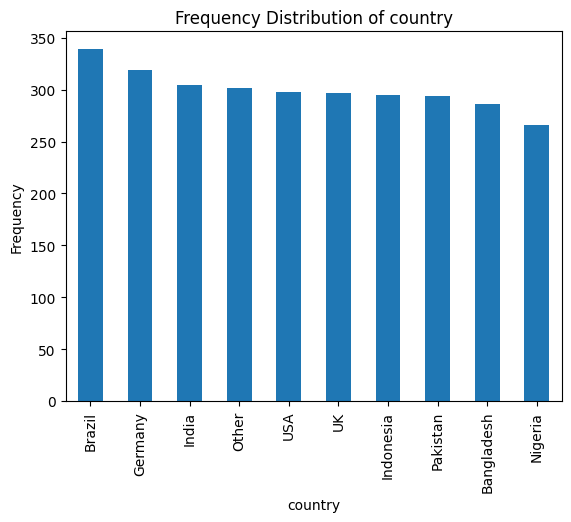

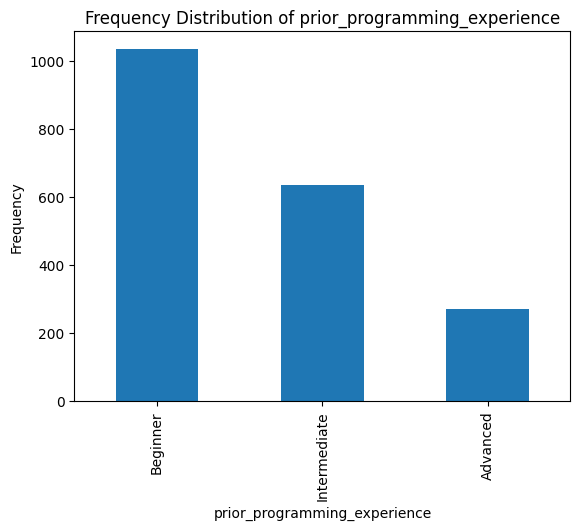

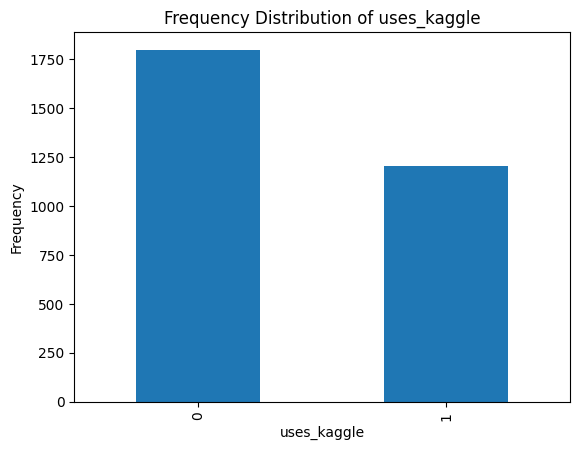

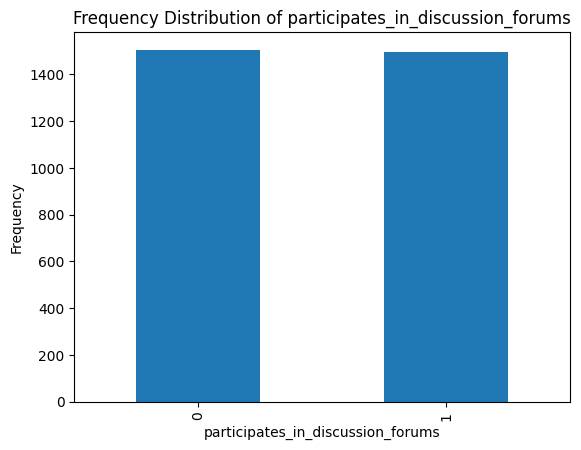

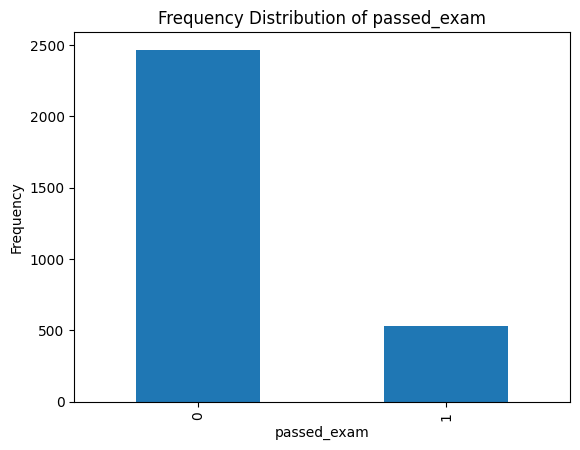

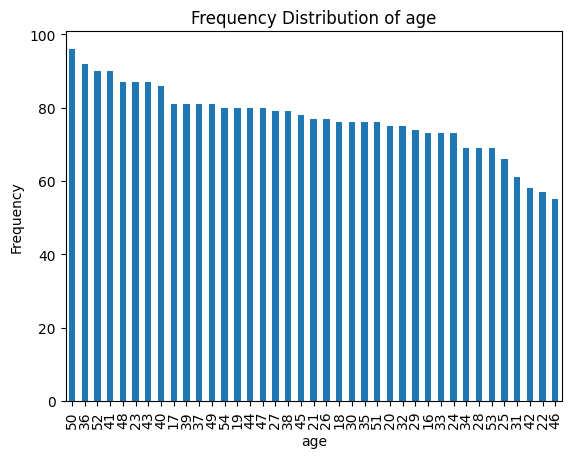

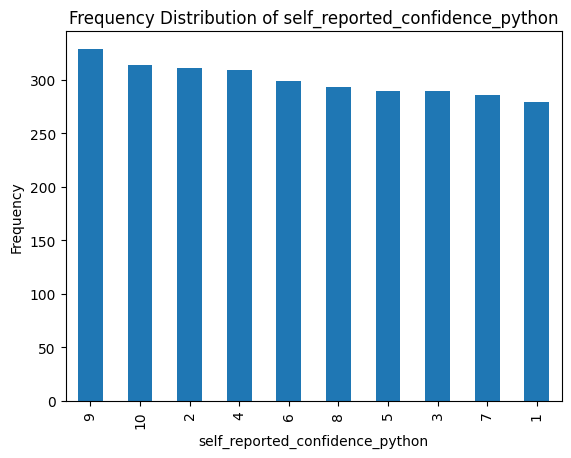

In [ ]:
for col in col_names_to_analyze:
  df[col].value_counts().plot(kind='bar')
  plt.title(f"Frequency Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

Interpretasi distribusi frekuensi menunjukkan beberapa pola penting dalam dataset. **Distribusi negara** relatif merata di berbagai kategori, sehingga tidak ada dominasi satu negara tertentu dan data bersifat cukup representatif secara geografis. **Pengalaman pemrograman sebelumnya** didominasi oleh kategori *Beginner*, diikuti *Intermediate* dan *Advanced*, yang mengindikasikan mayoritas peserta berasal dari latar belakang pemula. Variabel **uses_kaggle** menunjukkan lebih banyak siswa yang tidak menggunakan Kaggle, sementara **partisipasi forum diskusi** hampir seimbang antara yang aktif dan tidak aktif, menandakan tingkat keterlibatan sosial yang bervariasi.

Pada variabel target, **passed_exam** sangat tidak seimbang, dengan mayoritas siswa tidak lulus, sehingga menegaskan perlunya penanganan *class imbalance* dalam pemodelan. **Distribusi usia** tersebar cukup merata pada rentang 16–54 tahun tanpa puncak ekstrem, menunjukkan keragaman usia peserta. Sementara itu, **self-reported confidence Python** relatif merata di skala 1–10, dengan sedikit kecenderungan pada nilai menengah hingga tinggi, yang menandakan variasi kepercayaan diri yang luas dan berpotensi relevan dalam menjelaskan perbedaan hasil ujian.

# **B) DATA PREPARATION**

## Alasan menggunakan `df_cleaned = df.copy()`

Baris kode `df_cleaned = df.copy()` digunakan untuk membuat salinan independen dari DataFrame `df` ke dalam `df_cleaned`. Ini penting agar setiap modifikasi atau operasi pembersihan data yang dilakukan pada `df_cleaned` **tidak akan memengaruhi atau mengubah DataFrame `df` yang asli**.

Dengan demikian, `df` tetap utuh sebagai sumber data original, yang berguna jika kita perlu merujuk kembali ke data mentah atau melakukan analisis lain tanpa perubahan yang tidak diinginkan.

In [ ]:
df_cleaned = df.copy()

## Alasan menghapus kolom 'student_id'

Kolom `student_id` adalah pengidentifikasi unik untuk setiap siswa. Kolom ini tidak memberikan informasi prediktif yang berguna untuk model pembelajaran mesin karena tidak memiliki korelasi intrinsik dengan kinerja ujian atau variabel target lainnya. Menghapus kolom ini membantu mengurangi dimensi data dan mencegah potensi overfitting.

In [ ]:
df_cleaned = df_cleaned.drop('student_id', axis=1)

## Alasan menghapus kolom 'country'

Kolom `country` mungkin memperkenalkan bias geografis atau budaya yang tidak relevan dengan tujuan analisis yang berfokus pada faktor-faktor terkait pembelajaran dan kinerja. Walaupun semisalnya di-encode menjadi nilai numerik, keberadaan fitur ini dapat menambah kompleksitas yang tidak perlu tanpa memberikan kontribusi signifikan terhadap daya prediktif model untuk kinerja ujian. Selain itu, jika keragaman antar negara tidak menjadi fokus utama, penghapusan kolom ini dapat menyederhanakan model.

In [ ]:
df_cleaned = df_cleaned.drop('country', axis=1)

## Alasan menghapus kolom 'final_exam_score' (Data Leakage)

Kolom `final_exam_score` wajib dihapus karena berpotensi menimbulkan **data leakage**, mengingat variabel `passed_exam` secara langsung diturunkan dari nilai ujian akhir tersebut (misalnya lulus jika nilai berada di atas ambang batas tertentu). Dalam konteks ini, `final_exam_score` merepresentasikan informasi masa depan, sedangkan `passed_exam` adalah label hasil yang bergantung langsung pada nilai tersebut, sehingga jika `final_exam_score` tetap digunakan sebagai fitur, model tidak benar-benar belajar pola perilaku atau karakteristik pembelajaran siswa, melainkan hanya “mengintip jawaban”. Kondisi ini dikenal sebagai **target leakage atau label leakage**, yang secara akademik tidak valid karena menghasilkan performa model yang tampak sangat baik pada data pelatihan tetapi gagal melakukan generalisasi dengan baik pada data baru yang belum pernah dilihat sebelumnya.

In [ ]:
df_cleaned = df_cleaned.drop('final_exam_score', axis=1)
display(df_cleaned.head())

,age,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,passed_exam
0,54,Beginner,12,12.2,60,1,24,0,1,4,10,0
1,44,NaN,15,14.2,52,1,32,0,0,5,7,0
2,30,Intermediate,5,7.7,71,1,43,0,0,6,3,0
3,23,Beginner,4,5.6,64,2,40,1,0,3,10,0
4,36,NaN,3,3.5,62,1,47,1,0,3,7,0


## Penanganan Kolom 'prior_programming_experience'

Kolom `prior_programming_experience` memiliki proporsi *missing values* sebesar 35,4%. Meskipun persentasenya cukup tinggi, kolom ini sangat informatif dan memiliki sifat ordinal (Beginner, Intermediate, Advanced) yang relevan untuk analisis dan pemodelan.

Daripada langsung menghapus kolom, penanganan yang lebih tepat adalah mengelola *missing values* secara eksplisit dengan **imputasi berbasis kategori**. Pendekatan ini melibatkan penambahan kategori baru, seperti **'Unknown'**, untuk mengisi nilai-nilai yang hilang. Dengan demikian, kita dapat mempertahankan informasi yang mungkin terkandung dalam 'ketidakhadiran' data dan menghindari kehilangan data yang signifikan.

Kategori 'Unknown' juga akan diperlakukan sebagai bagian dari urutan ordinal dalam analisis lebih lanjut.

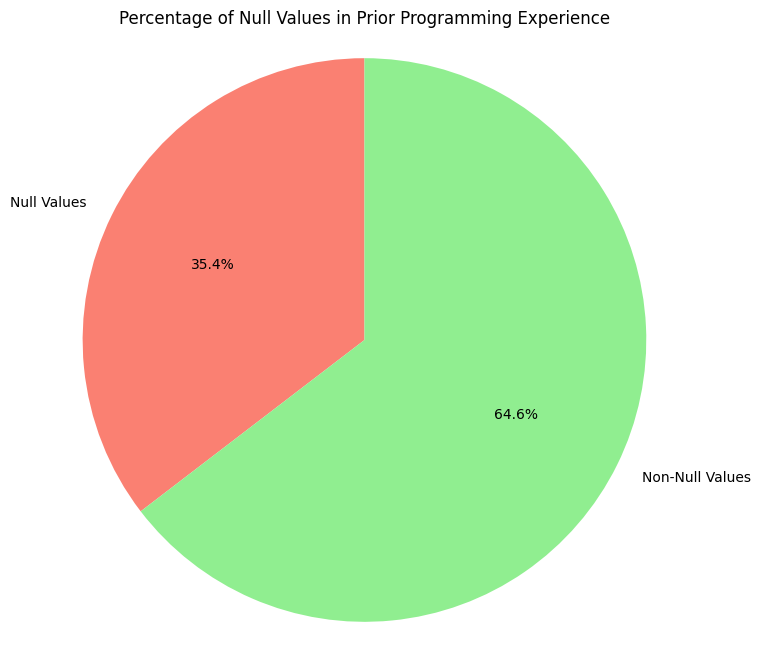

Null values: 1062 (35.40%)
Non-null values: 1938 (64.60%)


In [ ]:
# Calculate null values
null_count = df['prior_programming_experience'].isnull().sum()

# Calculate non-null values
not_null_count = df['prior_programming_experience'].notnull().sum()

# Create labels and sizes for the pie chart
labels = ['Null Values', 'Non-Null Values']
sizes = [null_count, not_null_count]

# Calculate percentages
total = null_count + not_null_count
null_percentage = (null_count / total) * 100
not_null_percentage = (not_null_count / total) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['salmon', 'lightgreen'])
plt.title('Percentage of Null Values in Prior Programming Experience')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

print(f"Null values: {null_count} ({null_percentage:.2f}%)")
print(f"Non-null values: {not_null_count} ({not_null_percentage:.2f}%)")

In [ ]:
df_cleaned['prior_programming_experience'] = df_cleaned['prior_programming_experience'].fillna('Unknown')
display(df_cleaned.head())

,age,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,passed_exam
0,54,Beginner,12,12.2,60,1,24,0,1,4,10,0
1,44,Unknown,15,14.2,52,1,32,0,0,5,7,0
2,30,Intermediate,5,7.7,71,1,43,0,0,6,3,0
3,23,Beginner,4,5.6,64,2,40,1,0,3,10,0
4,36,Unknown,3,3.5,62,1,47,1,0,3,7,0


# **C) EXPLORATORY DATA ANALYSIS, INCLUDE THE DATA VISUALIZATION**

## Exam Pass/Fail Count


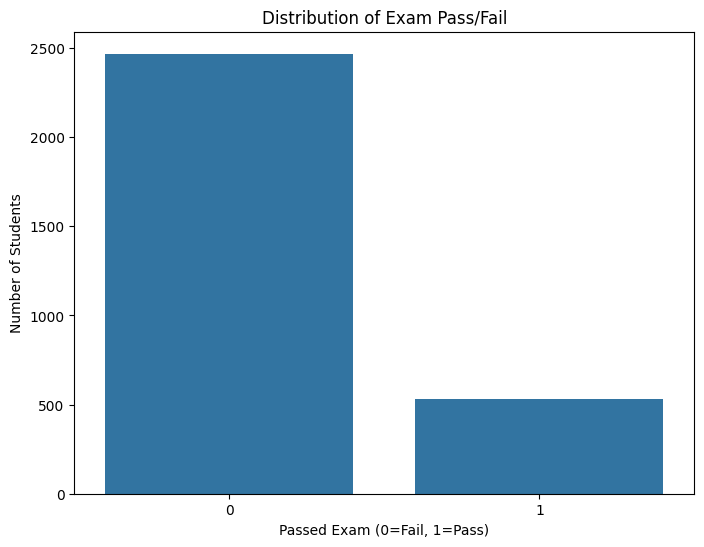

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='passed_exam', data=df_cleaned)
plt.title('Distribution of Exam Pass/Fail')
plt.xlabel('Passed Exam (0=Fail, 1=Pass)')
plt.ylabel('Number of Students')
plt.show()

Visualisasi countplot menunjukkan bahwa **kelas data tidak seimbang (class imbalance)**, di mana jumlah siswa yang **tidak lulus (passed_exam = 0)** jauh lebih besar dibandingkan siswa yang **lulus (passed_exam = 1)**. Hal ini mengindikasikan bahwa mayoritas peserta dalam dataset mengalami kesulitan untuk mencapai standar kelulusan, yang bisa disebabkan oleh variasi intensitas belajar, kemampuan dasar, atau keterlibatan dalam aktivitas pembelajaran. Dari sudut pandang data mining, kondisi ini penting untuk diperhatikan karena dapat memengaruhi performa model klasifikasi, sehingga pada tahap pemodelan selanjutnya perlu dipertimbangkan.


## Hours Spent Learning per Week vs. Practice Problems Solved

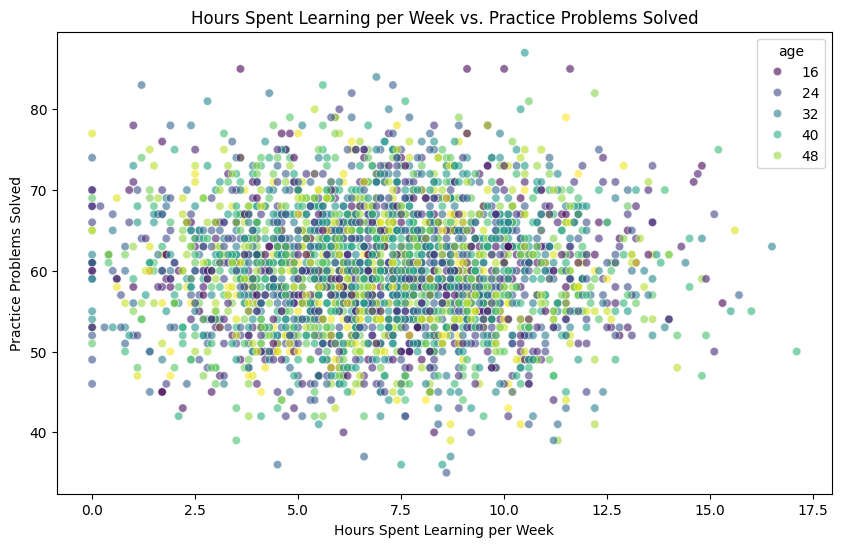

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hours_spent_learning_per_week', y='practice_problems_solved', data=df_cleaned, alpha=0.6, hue='age', palette='viridis')
plt.title('Hours Spent Learning per Week vs. Practice Problems Solved')
plt.xlabel('Hours Spent Learning per Week')
plt.ylabel('Practice Problems Solved')
plt.show()

Visualisasi scatter plot menunjukkan bahwa terdapat **hubungan positif yang lemah hingga moderat** antara jumlah jam belajar per minggu dan jumlah soal latihan yang diselesaikan, di mana siswa yang menghabiskan lebih banyak waktu belajar cenderung menyelesaikan lebih banyak soal, meskipun pola tersebut tidak sepenuhnya linear dan memiliki sebaran yang cukup luas. Variasi warna berdasarkan usia memperlihatkan bahwa **usia tidak membentuk klaster yang jelas**, menandakan bahwa perilaku belajar dan penyelesaian soal relatif konsisten di berbagai kelompok umur. Hal ini mengindikasikan bahwa **intensitas waktu belajar berkontribusi terhadap aktivitas praktik**, tetapi efektivitas belajar tetap dipengaruhi oleh faktor lain.

## Distribution of Prior Programming Experience

/tmp/ipython-input-859461935.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='prior_programming_experience', data=df_cleaned, palette='cividis', order=['Unknown', 'Beginner', 'Intermediate', 'Advanced'])


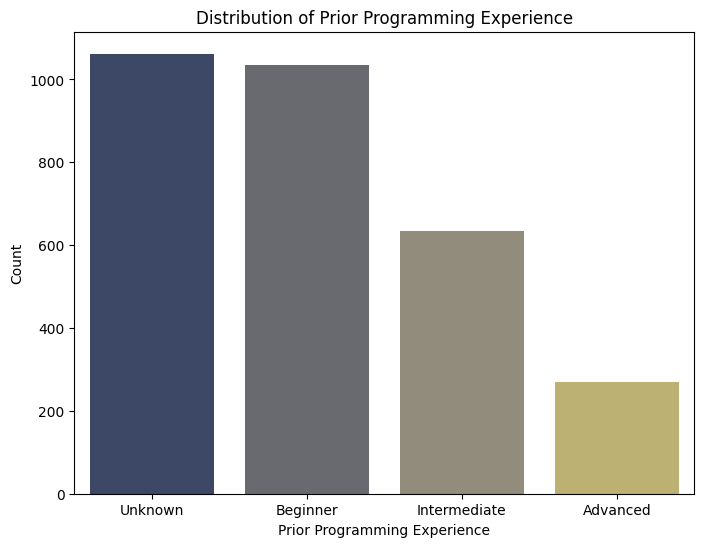

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='prior_programming_experience', data=df_cleaned, palette='cividis', order=['Unknown', 'Beginner', 'Intermediate', 'Advanced'])
plt.title('Distribution of Prior Programming Experience')
plt.xlabel('Prior Programming Experience')
plt.ylabel('Count')
plt.show()

Visualisasi distribusi menunjukkan bahwa kategori **`Unknown`** memiliki jumlah observasi yang paling besar, mengindikasikan proporsi missing value yang signifikan pada variabel pengalaman pemrograman sebelumnya. Di antara kategori yang terdefinisi, **Beginner** mendominasi populasi siswa, diikuti oleh **Intermediate**, sementara **Advanced** memiliki jumlah paling sedikit, yang mencerminkan bahwa sebagian besar peserta berasal dari latar belakang pemrograman dasar.

## Self-Reported Confidence by Exam Result

/tmp/ipython-input-3593857985.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='passed_exam', y='self_reported_confidence_python', data=df_cleaned, palette='plasma')


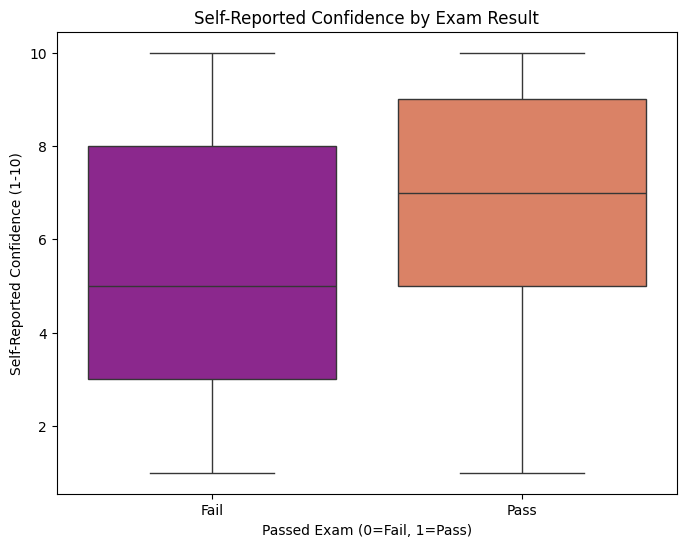

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='passed_exam', y='self_reported_confidence_python', data=df_cleaned, palette='plasma')
plt.title('Self-Reported Confidence by Exam Result')
plt.xlabel('Passed Exam (0=Fail, 1=Pass)')
plt.ylabel('Self-Reported Confidence (1-10)')
plt.xticks([0, 1], ['Fail', 'Pass'])
plt.show()

Boxplot menunjukkan perbedaan yang jelas antara tingkat kepercayaan diri siswa yang lulus dan tidak lulus ujian, di mana siswa yang **lulus (Pass)** memiliki median **self-reported confidence** yang lebih tinggi dibandingkan siswa yang **tidak lulus (Fail)**. Selain itu, distribusi nilai kepercayaan diri pada kelompok lulus cenderung berada pada rentang menengah hingga tinggi, sementara kelompok tidak lulus lebih terkonsentrasi pada tingkat kepercayaan diri yang lebih rendah, meskipun terdapat beberapa outlier pada kedua kelompok. Pola ini mengindikasikan bahwa **kepercayaan diri terhadap kemampuan Python berkorelasi positif dengan hasil ujian**, sehingga variabel `self_reported_confidence_python` merupakan fitur psikologis yang relevan dan berpotensi kuat dalam membedakan probabilitas kelulusan pada model klasifikasi.


## Weeks in Course Distribution by Exam Result

/tmp/ipython-input-2642097489.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='passed_exam', y='weeks_in_course', data=df_cleaned, palette='mako')


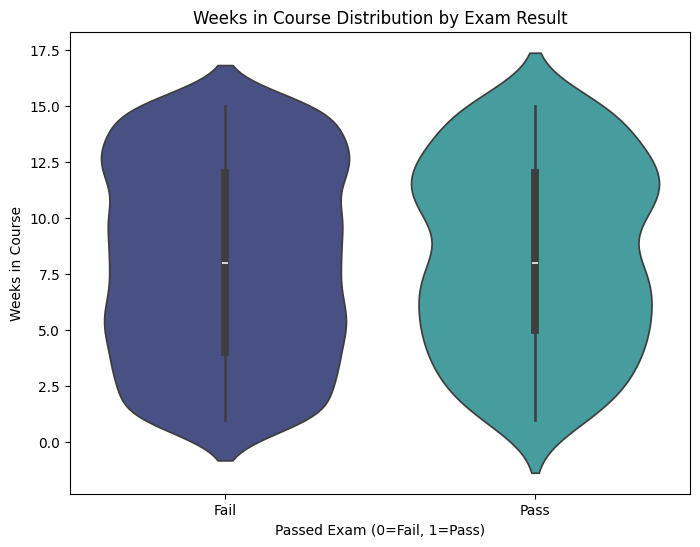

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='passed_exam', y='weeks_in_course', data=df_cleaned, palette='mako')
plt.title('Weeks in Course Distribution by Exam Result')
plt.xlabel('Passed Exam (0=Fail, 1=Pass)')
plt.ylabel('Weeks in Course')
plt.xticks([0, 1], ['Fail', 'Pass'])
plt.show()

Violin plot menunjukkan bahwa distribusi **lama mengikuti kursus (weeks_in_course)** antara siswa yang lulus dan tidak lulus memiliki pola yang relatif mirip dengan tingkat tumpang tindih yang cukup besar. Meskipun kelompok **lulus (Pass)** cenderung memiliki median dan kepadatan yang sedikit lebih tinggi pada minggu menengah hingga akhir, perbedaannya tidak terlalu mencolok dibandingkan kelompok **tidak lulus (Fail)**. Hal ini mengindikasikan bahwa **durasi keikutsertaan dalam kursus saja bukan faktor penentu utama kelulusan**, melainkan perlu dikombinasikan dengan variabel lain.

## Average Hours Spent Learning per Week by Prior Programming Experience

/tmp/ipython-input-1197525322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='prior_programming_experience', y='hours_spent_learning_per_week', data=df_cleaned, order=['Unknown', 'Beginner', 'Intermediate', 'Advanced'], palette='rocket')


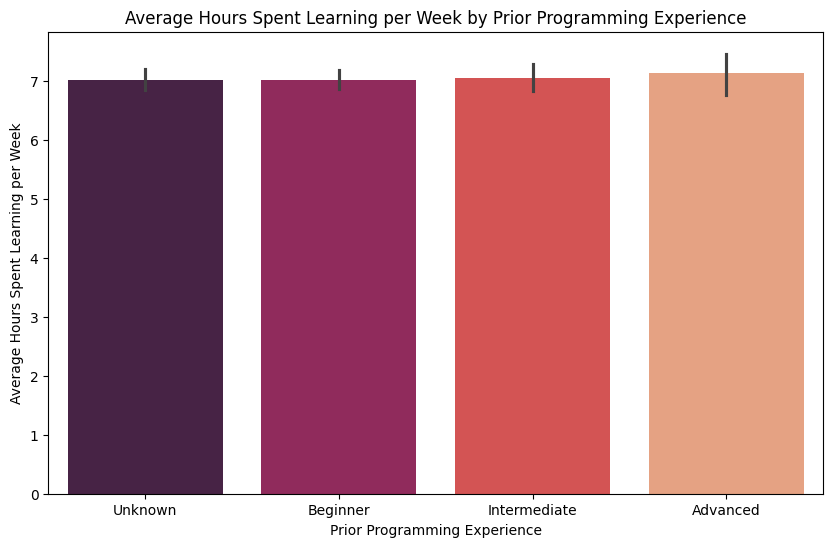

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='prior_programming_experience', y='hours_spent_learning_per_week', data=df_cleaned, order=['Unknown', 'Beginner', 'Intermediate', 'Advanced'], palette='rocket')
plt.title('Average Hours Spent Learning per Week by Prior Programming Experience')
plt.xlabel('Prior Programming Experience')
plt.ylabel('Average Hours Spent Learning per Week')
plt.show()

Bar plot menunjukkan bahwa **rata-rata jam belajar per minggu relatif mirip di seluruh tingkat pengalaman pemrograman sebelumnya**, baik pada kategori `Unknown`, `Beginner`, `Intermediate`, maupun `Advanced`. Meskipun terdapat sedikit peningkatan pada kelompok **Advanced**, perbedaannya tidak signifikan dan error bar yang saling tumpang tindih mengindikasikan variasi yang serupa antar kelompok. Hal ini menunjukkan bahwa **pengalaman pemrograman awal tidak secara langsung menentukan intensitas waktu belajar**, karena siswa dengan latar belakang yang berbeda cenderung mencurahkan waktu belajar yang hampir sama selama mengikuti kursus.

# **D) FEATURE ENGINEERING**

In [ ]:
# duplicate df
df_encoded = df_cleaned.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Ordinal Encoding
# Columns: prior_programming_experience
programming_experience_mapping = {'Unknown': 0, 'Beginner': 1,'Intermediate': 2, 'Advanced': 3}
df_encoded['prior_programming_experience'] = df_encoded['prior_programming_experience'].map(programming_experience_mapping)
df_encoded.sample(n = 5)

,age,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,passed_exam
2050,22,2,12,6.0,55,1,35,1,0,6,3,0
269,53,0,7,4.2,48,0,31,0,1,3,7,0
2514,20,1,12,9.3,46,2,49,0,0,6,8,0
1856,43,0,8,6.0,51,1,33,0,0,1,4,0
1526,17,1,12,7.1,65,1,31,0,0,1,2,0


# **E) CREATE MODEL**

## Split the dataset into Training set and Testing set.

In [ ]:
X = df_encoded.drop('passed_exam', axis=1)
y = df_encoded['passed_exam']

In [ ]:
X.head()

,age,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python
0,54,1,12,12.2,60,1,24,0,1,4,10
1,44,0,15,14.2,52,1,32,0,0,5,7
2,30,2,5,7.7,71,1,43,0,0,6,3
3,23,1,4,5.6,64,2,40,1,0,3,10
4,36,0,3,3.5,62,1,47,1,0,3,7


In [ ]:
y.head() # ensure the target is correct

,passed_exam
0,0
1,0
2,0
3,0
4,0


Subtask:
Split the encoded data into training and testing sets.

Reasoning: Split the encoded feature DataFrame X and the target Series y into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Pembagian data **80:20** dipilih karena memberikan keseimbangan yang baik antara jumlah data untuk **melatih model** dan data untuk **mengukur kemampuan generalisasi** pada data yang belum pernah dilihat. Dengan 80% data latih, model memiliki cukup banyak informasi untuk mempelajari pola yang stabil, terutama pada dataset berukuran menengah hingga besar. Sementara itu, 20% data uji sudah memadai untuk menghasilkan evaluasi performa yang representatif tanpa mengorbankan kualitas proses pelatihan.

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((2400, 11), (600, 11))

In [ ]:
X_train.head()

,age,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python
2370,18,1,10,7.1,63,2,33,0,1,5,6
1774,40,2,2,7.6,59,2,32,0,0,8,7
731,41,1,12,7.0,51,3,33,0,0,2,3
271,23,0,1,10.0,46,2,40,1,0,3,8
1077,52,3,10,0.6,69,4,39,1,0,2,9


In [ ]:
X_test.head()

,age,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python
311,17,2,4,9.6,73,1,50,1,0,6,5
1025,38,3,8,9.1,54,2,33,0,0,5,4
1587,23,0,2,3.3,61,1,39,0,1,7,2
2941,19,1,13,4.6,49,2,40,1,1,6,8
2980,26,0,8,4.0,71,1,42,1,1,3,7


## 1. BASE MODEL

### 1.1 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train_tree = tree.predict(X_train)
y_pred_test_tree = tree.predict(X_test)

print("Decision Tree")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train_tree))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_tree))

Decision Tree

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1978
           1       1.00      1.00      1.00       422

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       490
           1       0.59      0.62      0.60       110

    accuracy                           0.85       600
   macro avg       0.75      0.76      0.76       600
weighted avg       0.85      0.85      0.85       600



Pada data uji, model Decision Tree mencapai akurasi sebesar 85%, yang menunjukkan bahwa sebagian besar data dapat diklasifikasikan dengan benar. Model memiliki performa yang baik dalam mengenali kelas 0, dengan nilai precision 0,91 dan recall 0,90, sehingga kesalahan klasifikasi pada kelas ini relatif rendah. Namun, kinerja model pada kelas 1 masih kurang optimal, ditunjukkan oleh nilai precision 0,59 dan recall 0,62, yang berarti masih terdapat cukup banyak data kelas 1 yang salah diprediksi atau tidak berhasil terdeteksi. Hal ini mengindikasikan bahwa model lebih bias terhadap kelas mayoritas dan kurang efektif dalam mengklasifikasikan kelas minoritas pada data uji.

### 1.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=100, max_features="sqrt",
                               max_depth=6, max_leaf_nodes=6)
randomforest.fit(X_train, y_train)

y_pred_train_randomforest = randomforest.predict(X_train)
y_pred_test_randomforest = randomforest.predict(X_test)

print("Random Forest")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train_randomforest))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_randomforest))

Random Forest

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1978
           1       0.97      0.08      0.14       422

    accuracy                           0.84      2400
   macro avg       0.90      0.54      0.53      2400
weighted avg       0.86      0.84      0.78      2400


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       490
           1       1.00      0.08      0.15       110

    accuracy                           0.83       600
   macro avg       0.91      0.54      0.53       600
weighted avg       0.86      0.83      0.77       600



Pada data uji, model Random Forest menghasilkan akurasi sebesar 83%, yang secara umum menunjukkan kinerja yang cukup baik. Model sangat efektif dalam mengklasifikasikan kelas 0, dengan nilai recall 1,00 dan F1-score 0,91, yang berarti hampir seluruh data kelas 0 berhasil dikenali dengan benar. Namun, performa model pada kelas 1 sangat rendah, ditunjukkan oleh nilai recall hanya 0,08 dan F1-score 0,15, yang berarti sebagian besar data kelas 1 tidak berhasil terdeteksi dan justru diklasifikasikan sebagai kelas 0. Meskipun precision kelas 1 mencapai 1,00, hal ini terjadi karena model sangat jarang memprediksi kelas 1, sehingga prediksi yang sedikit tersebut kebetulan benar. Secara keseluruhan, hasil ini menunjukkan bahwa model Random Forest sangat bias terhadap kelas mayoritas dan kurang mampu mengenali kelas minoritas pada data uji.

### 1.3 XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgboost = XGBClassifier(
    n_estimators=100,       # number of tree
    max_depth=6,            # max depth for each tree
    learning_rate=0.1,      # learning speed (default 0.1)
    subsample=0.8,          # proportion of samples used per tree
    colsample_bytree=0.8,   # proportion of features used by each tree
    objective='binary:logistic',  # binary classification
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'   # avoid warnings from XGBoost
)

# model practice
xgboost.fit(X_train, y_train)

# prediction
y_pred_train_xgboost = xgboost.predict(X_train)
y_pred_test_xgboost = xgboost.predict(X_test)

# evaluation
print("XGBoost Classifier")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train_xgboost))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_xgboost))


XGBoost Classifier

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1978
           1       0.99      0.97      0.98       422

    accuracy                           0.99      2400
   macro avg       0.99      0.98      0.99      2400
weighted avg       0.99      0.99      0.99      2400


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       490
           1       0.75      0.67      0.71       110

    accuracy                           0.90       600
   macro avg       0.84      0.81      0.82       600
weighted avg       0.90      0.90      0.90       600



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:43:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pada data uji, model XGBoost Classifier menunjukkan performa yang paling seimbang dengan akurasi sebesar 90%. Model mampu mengklasifikasikan kelas 0 dengan sangat baik, ditunjukkan oleh nilai precision 0,93 dan recall 0,95, sehingga sebagian besar data kelas mayoritas dapat dikenali dengan benar. Selain itu, kinerja pada kelas 1 juga tergolong cukup baik dibandingkan model sebelumnya, dengan precision 0,75, recall 0,67, dan F1-score 0,71, yang menunjukkan bahwa model mampu mendeteksi sebagian besar kelas minoritas dengan tingkat kesalahan yang relatif lebih rendah. Secara keseluruhan, hasil ini mengindikasikan bahwa XGBoost memiliki kemampuan generalisasi yang lebih baik dan lebih efektif dalam menangani ketidakseimbangan kelas pada data uji.

## 2. MODEL (OVERSAMPLING)

In [ ]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
categorical_features = [
    'prior_programming_experience',
    'projects_completed',
    'uses_kaggle',
    'participates_in_discussion_forums',
    'self_reported_confidence_python'
]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((3948, 11), (988, 11))

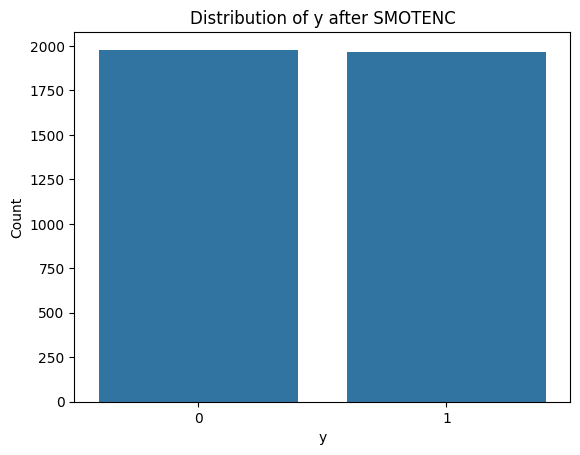

In [ ]:
# just to visualize the distribution of target class after SMOTENC

sns.countplot(x=y_train)
plt.title('Distribution of y after SMOTENC')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

Sukses solve oversampling dengan smotenc.

### 2.1 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train_tree = tree.predict(X_train)
y_pred_test_tree = tree.predict(X_test)

print("Decision Tree")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train_tree))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_tree))

Decision Tree

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1979
           1       1.00      1.00      1.00      1969

    accuracy                           1.00      3948
   macro avg       1.00      1.00      1.00      3948
weighted avg       1.00      1.00      1.00      3948


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       489
           1       0.86      0.84      0.85       499

    accuracy                           0.85       988
   macro avg       0.85      0.85      0.85       988
weighted avg       0.85      0.85      0.85       988



Pada data uji setelah diterapkan oversampling menggunakan SMOTENC, model Decision Tree menghasilkan akurasi sebesar 85% dengan performa yang relatif seimbang antara kelas 0 dan kelas 1. Nilai precision, recall, dan F1-score untuk kedua kelas berada di kisaran 0,84–0,86, yang menunjukkan bahwa model mampu mengklasifikasikan kedua kelas dengan tingkat kesalahan yang hampir sama. Hal ini menandakan bahwa penerapan SMOTENC berhasil mengurangi bias terhadap kelas tertentu dan meningkatkan kemampuan model dalam mengenali kelas minoritas, sehingga kinerja model pada data uji menjadi lebih stabil dan seimbang dibandingkan sebelum dilakukan oversampling.

### 2.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=100, max_features="sqrt",
                               max_depth=6, max_leaf_nodes=6)
randomforest.fit(X_train, y_train)

y_pred_train_randomforest = randomforest.predict(X_train)
y_pred_test_randomforest = randomforest.predict(X_test)

print("Random Forest")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train_randomforest))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_randomforest))

Random Forest

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1979
           1       0.83      0.90      0.87      1969

    accuracy                           0.86      3948
   macro avg       0.87      0.86      0.86      3948
weighted avg       0.87      0.86      0.86      3948


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       489
           1       0.82      0.87      0.85       499

    accuracy                           0.84       988
   macro avg       0.84      0.84      0.84       988
weighted avg       0.84      0.84      0.84       988



Pada data uji setelah penerapan oversampling menggunakan SMOTENC, model Random Forest mencapai akurasi sebesar 84% dengan performa yang cukup seimbang antara kelas 0 dan kelas 1. Nilai precision, recall, dan F1-score untuk kedua kelas berada pada rentang yang relatif dekat, di mana kelas 0 memiliki F1-score 0,83 dan kelas 1 sebesar 0,85. Hal ini menunjukkan bahwa model mampu mengenali kedua kelas dengan baik tanpa bias yang kuat terhadap salah satu kelas. Dengan demikian, penggunaan SMOTENC membantu Random Forest dalam menangani ketidakseimbangan kelas dan meningkatkan kestabilan kinerja model pada data uji.

### 2.3 XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgboost = XGBClassifier(
    n_estimators=100,       # number of tree
    max_depth=6,            # max depth for each tree
    learning_rate=0.1,      # learning speed (default 0.1)
    subsample=0.8,          # proportion of samples used per tree
    colsample_bytree=0.8,   # proportion of features used by each tree
    objective='binary:logistic',  # binary classification
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'   # avoid warnings from XGBoost
)

# model practice
xgboost.fit(X_train, y_train)

# prediction
y_pred_train_xgboost = xgboost.predict(X_train)
y_pred_test_xgboost = xgboost.predict(X_test)

# evaluation
print("XGBoost Classifier")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train_xgboost))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_xgboost))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:53:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classifier

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1979
           1       0.97      0.99      0.98      1969

    accuracy                           0.98      3948
   macro avg       0.98      0.98      0.98      3948
weighted avg       0.98      0.98      0.98      3948


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       489
           1       0.90      0.92      0.91       499

    accuracy                           0.91       988
   macro avg       0.91      0.91      0.91       988
weighted avg       0.91      0.91      0.91       988



Pada data uji setelah diterapkan oversampling menggunakan SMOTENC, model XGBoost Classifier menunjukkan kinerja terbaik dibandingkan model lainnya dengan akurasi sebesar 91%. Model mampu mengklasifikasikan kelas 0 dan kelas 1 secara seimbang, ditunjukkan oleh nilai precision, recall, dan F1-score yang hampir sama pada kedua kelas, yaitu berada di kisaran 0,89–0,92. Hal ini menandakan bahwa XGBoost memiliki kemampuan generalisasi yang sangat baik serta efektif dalam menangani ketidakseimbangan kelas setelah dilakukan SMOTENC, sehingga menghasilkan performa yang stabil dan konsisten pada data uji.

**Performa semakin membaik, tetapi kami ingin mencoba peruntungan. Oleh karena itu, kami ingin mengatasi overfitting dengan KFold Cross Validation..**

## 3. MODEL (KFOLD CROSS VALIDATION)

In [ ]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 3948, Test set:988
Fold:2, Train set: 3949, Test set:987
Fold:3, Train set: 3949, Test set:987
Fold:4, Train set: 3949, Test set:987
Fold:5, Train set: 3949, Test set:987


Output ini menunjukkan bagaimana data Anda dibagi menjadi 5 bagian (fold) untuk validasi silang. Setiap fold akan digunakan sebagai set pengujian sekali, sementara sisanya digunakan untuk melatih model.

### 3.1 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.87329435 0.87311828 0.85232904 0.87279843 0.85380117]
Average score: 0.87


Hasil evaluasi Decision Tree menggunakan K-Fold Cross Validation menunjukkan bahwa nilai akurasi pada setiap fold berada di kisaran 0,85 hingga 0,87, dengan rata-rata akurasi sebesar 0,87. Konsistensi nilai skor antar fold ini menandakan bahwa model memiliki performa yang relatif stabil dan tidak terlalu bergantung pada pembagian data tertentu. Dengan demikian, Decision Tree dapat dikatakan memiliki kemampuan generalisasi yang cukup baik terhadap data yang berbeda, meskipun masih terdapat sedikit variasi performa antar fold.

### 3.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_score = cross_val_score(RandomForestClassifier(n_estimators=100, max_features="sqrt",
                               max_depth=6, max_leaf_nodes=6, random_state=42), X, y, cv=kf, scoring="f1")
print(f'Random Forest Scores for each fold are: {rf_score}')
print(f'Random Forest Average score: {"{:.2f}".format(rf_score.mean())}')

Random Forest Scores for each fold are: [0.86872587 0.85947047 0.86424474 0.87715931 0.87022901]
Random Forest Average score: 0.87


Hasil evaluasi Random Forest menggunakan K-Fold Cross Validation menunjukkan bahwa nilai akurasi pada setiap fold berada pada rentang 0,86 hingga 0,88, dengan rata-rata akurasi sebesar 0,87. Nilai skor yang relatif konsisten antar fold ini menunjukkan bahwa model Random Forest memiliki performa yang stabil dan mampu melakukan generalisasi dengan baik pada berbagai pembagian data. Variasi skor yang kecil juga mengindikasikan bahwa model tidak terlalu sensitif terhadap perubahan data latih dan data uji pada setiap fold.

### 3.3 XGBoost

In [ ]:
from xgboost import XGBClassifier

# Re-instantiate XGBoost with the same parameters used previously
xgboost_cv = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_score = cross_val_score(xgboost_cv, X, y, cv=kf, scoring="f1")
print(f'XGBoost Scores for each fold are: {xgb_score}')
print(f'XGBoost Average score: {"{:.2f}".format(xgb_score.mean())}')

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:59:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:59:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:59:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:59:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:59:55] WARNING: /w

XGBoost Scores for each fold are: [0.9178744  0.91397849 0.91193738 0.91780822 0.9245648 ]
XGBoost Average score: 0.92


Hasil evaluasi XGBoost menggunakan K-Fold Cross Validation menunjukkan bahwa nilai akurasi pada setiap fold berada pada rentang 0,91 hingga 0,92, dengan rata-rata akurasi sebesar 0,92. Konsistensi skor yang tinggi antar fold ini menandakan bahwa model XGBoost memiliki performa yang sangat stabil serta kemampuan generalisasi yang lebih baik dibandingkan model lainnya. Tingginya nilai rata-rata akurasi juga menunjukkan bahwa XGBoost mampu mempelajari pola data secara efektif dan memberikan hasil yang konsisten pada berbagai pembagian data.

## 4. MODEL (GridSearchCV)

### 4.1 Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 7, 'random_state': 0}
Best cross-validation f1 score: 0.873


Hasil GridSearchCV pada model Decision Tree menunjukkan bahwa dari 60 kombinasi parameter yang diuji menggunakan 5-fold cross validation, kombinasi terbaik diperoleh dengan parameter criterion = gini dan max_depth = 7. Model terbaik ini menghasilkan nilai F1-score cross-validation sebesar 0,873, yang menandakan keseimbangan yang cukup baik antara precision dan recall. Pemilihan nilai max_depth yang terbatas juga menunjukkan bahwa pembatasan kompleksitas pohon membantu mengurangi overfitting dan meningkatkan kemampuan generalisasi model terhadap data yang belum pernah dilihat.

### 4.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'max_features': ['sqrt'],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'random_state': [42]
}

rf_clf = RandomForestClassifier() # Initialize a Random Forest classifier
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search_rf.fit(X_train, y_train)

best_rf_clf = grid_search_rf.best_estimator_ # Get the best estimator from the grid search
y_pred_test_rf = best_rf_clf.predict(X_test)

print("Random Forest - Best parameters: ", grid_search_rf.best_params_)
print("Random Forest - Best cross-validation f1 score: {:.3f}".format(grid_search_rf.best_score_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Random Forest - Best parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 42}
Random Forest - Best cross-validation f1 score: 0.906


Hasil GridSearchCV pada model Random Forest menunjukkan bahwa dari 16 kombinasi parameter yang diuji menggunakan 5-fold cross validation, konfigurasi terbaik diperoleh dengan max_depth = 10, max_features = sqrt, min_samples_leaf = 2, min_samples_split = 5, n_estimators = 200, dan random_state = 42. Model terbaik ini menghasilkan nilai F1-score cross-validation sebesar 0,906, yang menunjukkan peningkatan kinerja dibandingkan Decision Tree serta keseimbangan yang lebih baik antara precision dan recall. Hasil ini mengindikasikan bahwa pengaturan parameter yang tepat mampu meningkatkan kemampuan generalisasi Random Forest dan mengurangi risiko overfitting.

### 4.3 XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'random_state': [42]
}

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss') # Initialize an XGBoost classifier
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search_xgb.fit(X_train, y_train)

best_xgb_clf = grid_search_xgb.best_estimator_ # Get the best estimator from the grid search
y_pred_test_xgb = best_xgb_clf.predict(X_test)

print("XGBoost - Best parameters: ", grid_search_xgb.best_params_)
print("XGBoost - Best cross-validation f1 score: {:.3f}".format(grid_search_xgb.best_score_))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
XGBoost - Best parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'random_state': 42, 'subsample': 0.9}
XGBoost - Best cross-validation f1 score: 0.917


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:19:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Hasil GridSearchCV pada model XGBoost menunjukkan bahwa dari 32 kombinasi parameter yang diuji menggunakan 5-fold cross validation, konfigurasi terbaik diperoleh dengan max_depth = 5, learning_rate = 0.1, n_estimators = 200, subsample = 0.9, colsample_bytree = 0.8, dan random_state = 42. Model terbaik ini menghasilkan nilai F1-score cross-validation sebesar 0,917, yang merupakan yang tertinggi dibandingkan model lainnya. Hal ini menunjukkan bahwa XGBoost memiliki kemampuan generalisasi yang sangat baik serta keseimbangan optimal antara precision dan recall setelah dilakukan optimasi hyperparameter.

In [ ]:
# Update the copied variables with the latest values
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()
X_test_copy = X_test.copy()
y_test_copy = y_test.copy()

y_pred_train_xgboost_copy = y_pred_train_xgboost.copy()
y_pred_test_xgboost_copy = y_pred_test_xgboost.copy()
y_pred_train_randomforest_copy = y_pred_train_randomforest.copy()
y_pred_test_randomforest_copy = y_pred_test_randomforest.copy()
y_pred_train_tree_copy = y_pred_train_tree.copy()
y_pred_test_tree_copy = y_pred_test_tree.copy()

Dengan membuat salinan X_train, y_train, X_test, y_test, dan hasil prediksi pada tahap ini, kita dapat menyimpan kondisi data dan performa model saat ini sebagai titik pemeriksaan (checkpoint). Ini berguna untuk dengan mudah kembali ke kondisi ini jika langkah-langkah selanjutnya, seperti pemilihan fitur, menyebabkan performa yang lebih buruk, dan untuk membandingkan dampak langkah-langkah tersebut pada model. Selanjutnya, kita akan melanjutkan dengan pemilihan fitur untuk melihat apakah kita dapat lebih meningkatkan performa model dengan menggunakan kumpulan fitur terpenting yang lebih sedikit.

## 5. MODEL (FEATURE SELECTION)

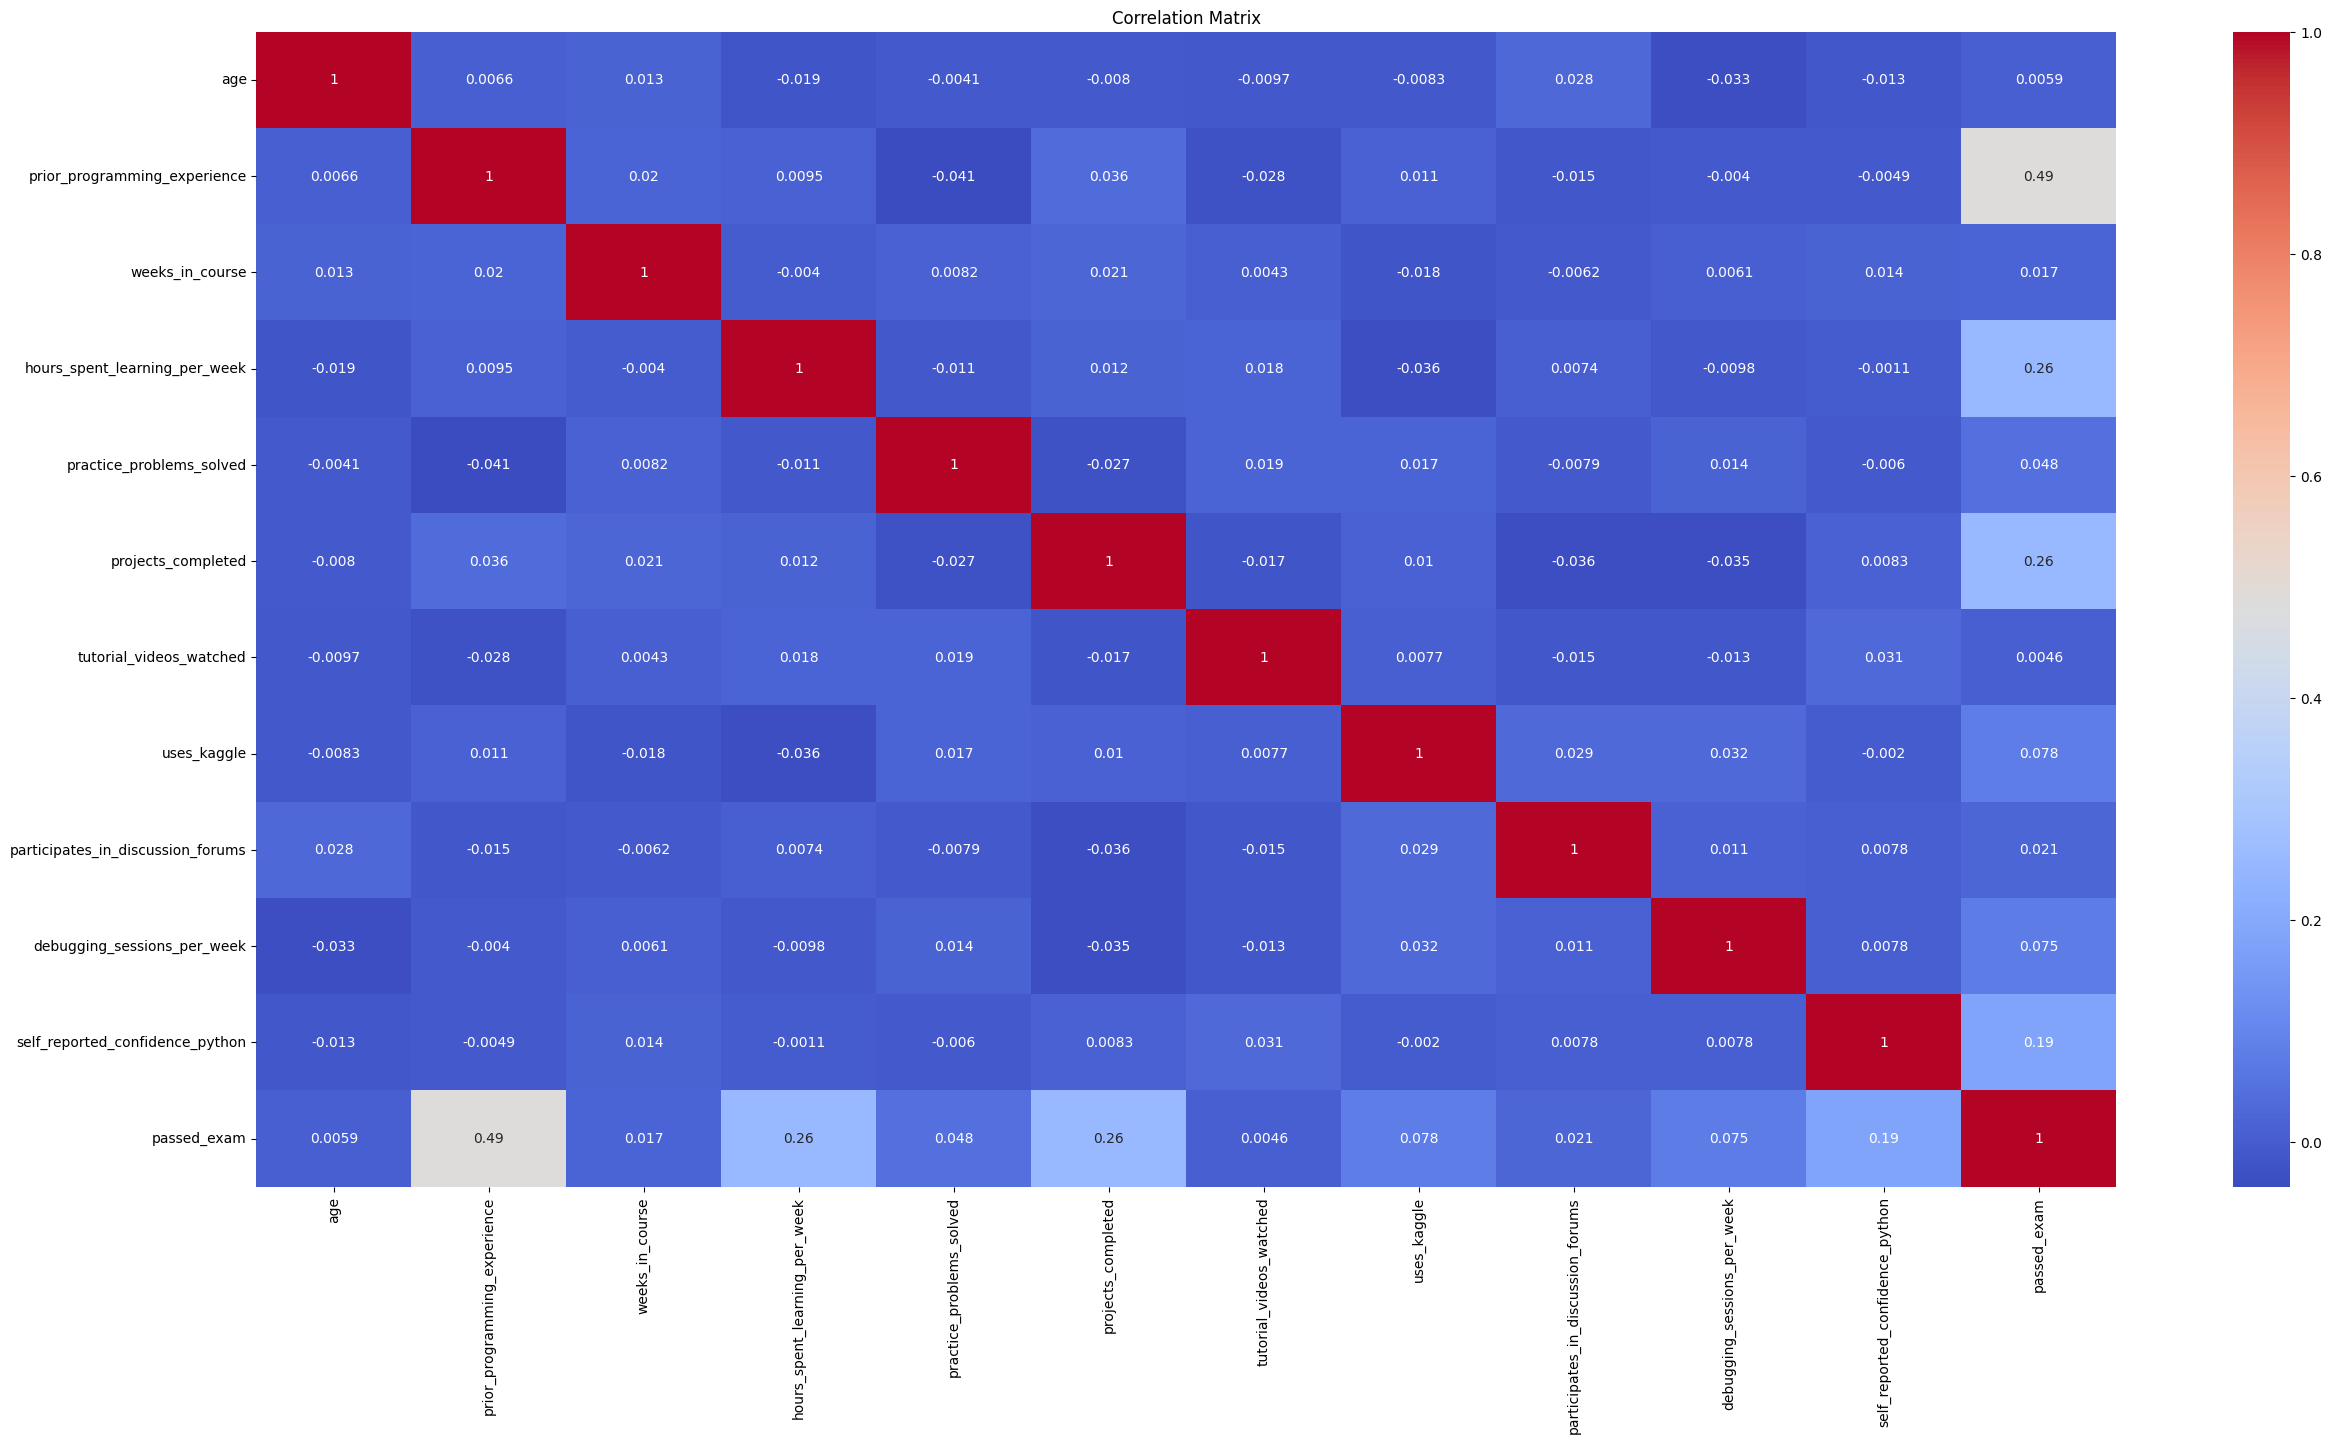

In [ ]:
# show heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance decision tree

Feature importances:
[0.05495466 0.42440495 0.03232833 0.14429801 0.06444604 0.07199052
 0.04689504 0.02323248 0.00888181 0.03005568 0.09851249]


In [ ]:
print("Feature importances:\n{}".format(randomforest.feature_importances_)) #function for feature importance random forest

Feature importances:
[3.19865570e-03 5.81156958e-01 7.38789745e-03 1.61155447e-01
 2.74029957e-03 7.83711431e-02 7.82049361e-04 8.53742030e-03
 1.01841308e-04 4.09858913e-03 1.52469699e-01]


In [ ]:
print("Feature importances:\n{}".format(xgboost.feature_importances_)) #function for feature importance XGBoost

Feature importances:
[0.02808631 0.54742235 0.02895651 0.07027213 0.02937706 0.06789829
 0.02404856 0.05300861 0.02818151 0.02869638 0.09405237]


In [ ]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)


Feature Importances Decision Tree


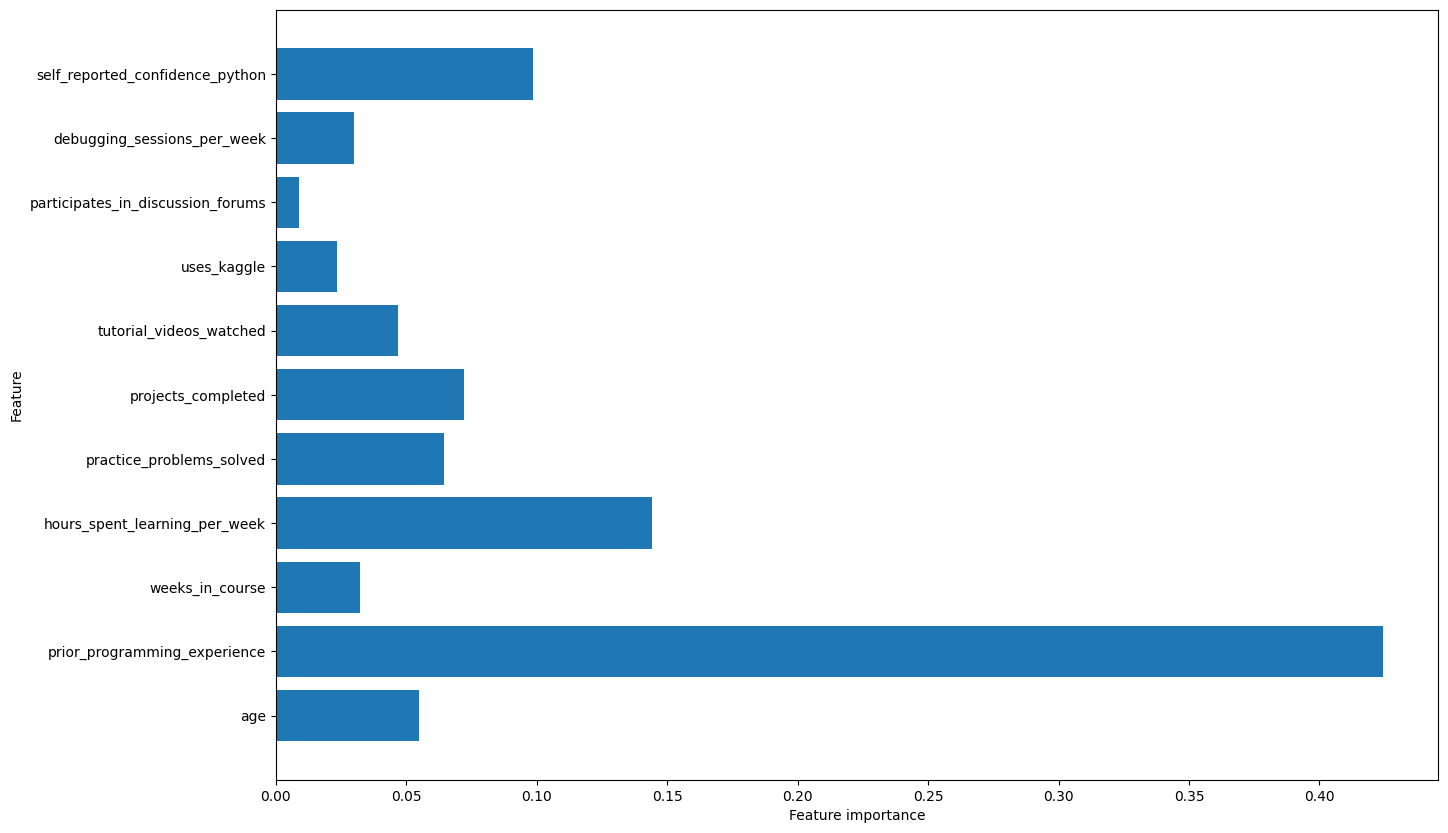

In [ ]:
print("Feature Importances Decision Tree")
plot_feature_importances_attrition(tree)

Feature Importances Random Forest


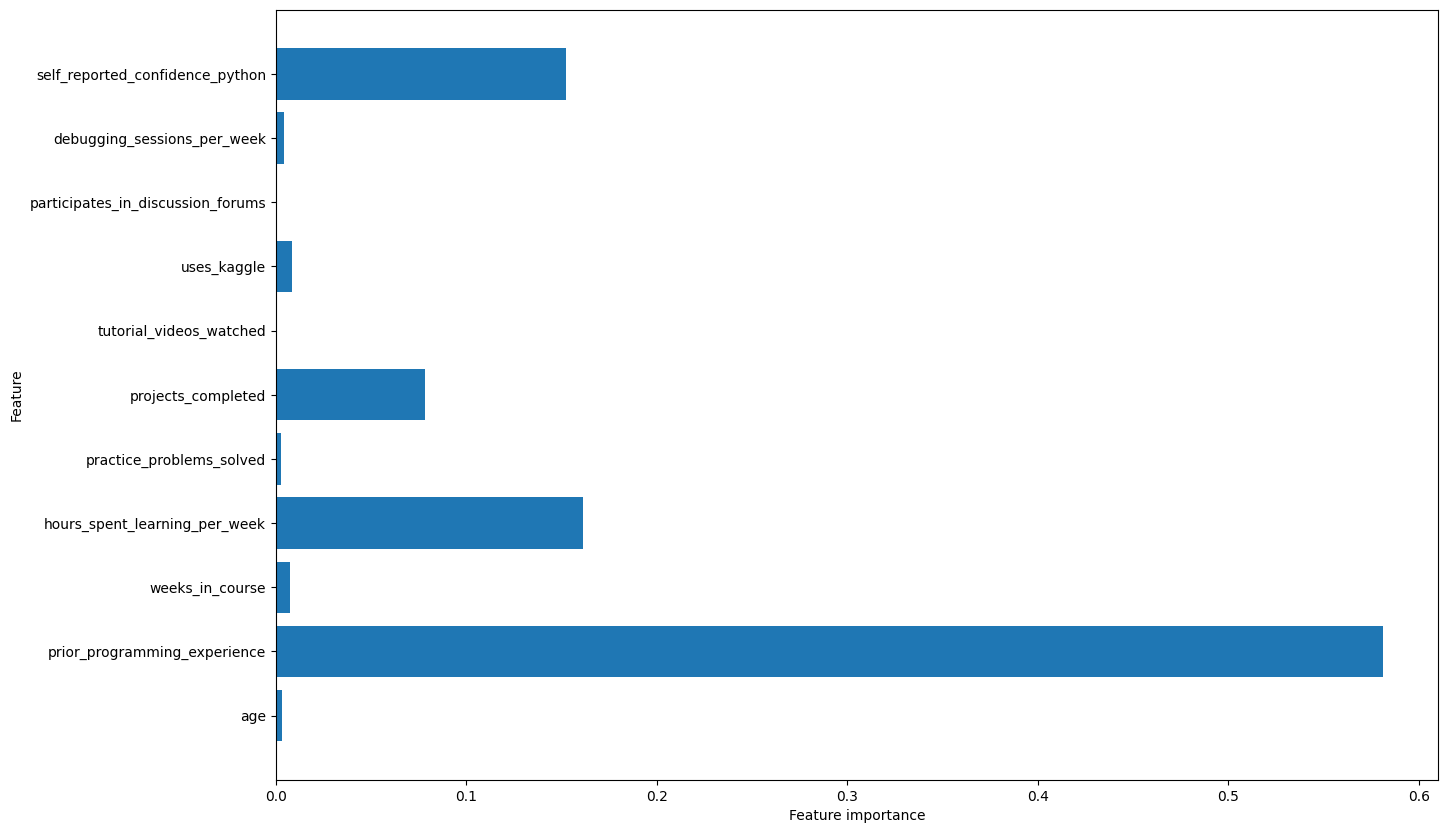

In [ ]:
print("Feature Importances Random Forest")
plot_feature_importances_attrition(randomforest)

Feature Importances XGBoost


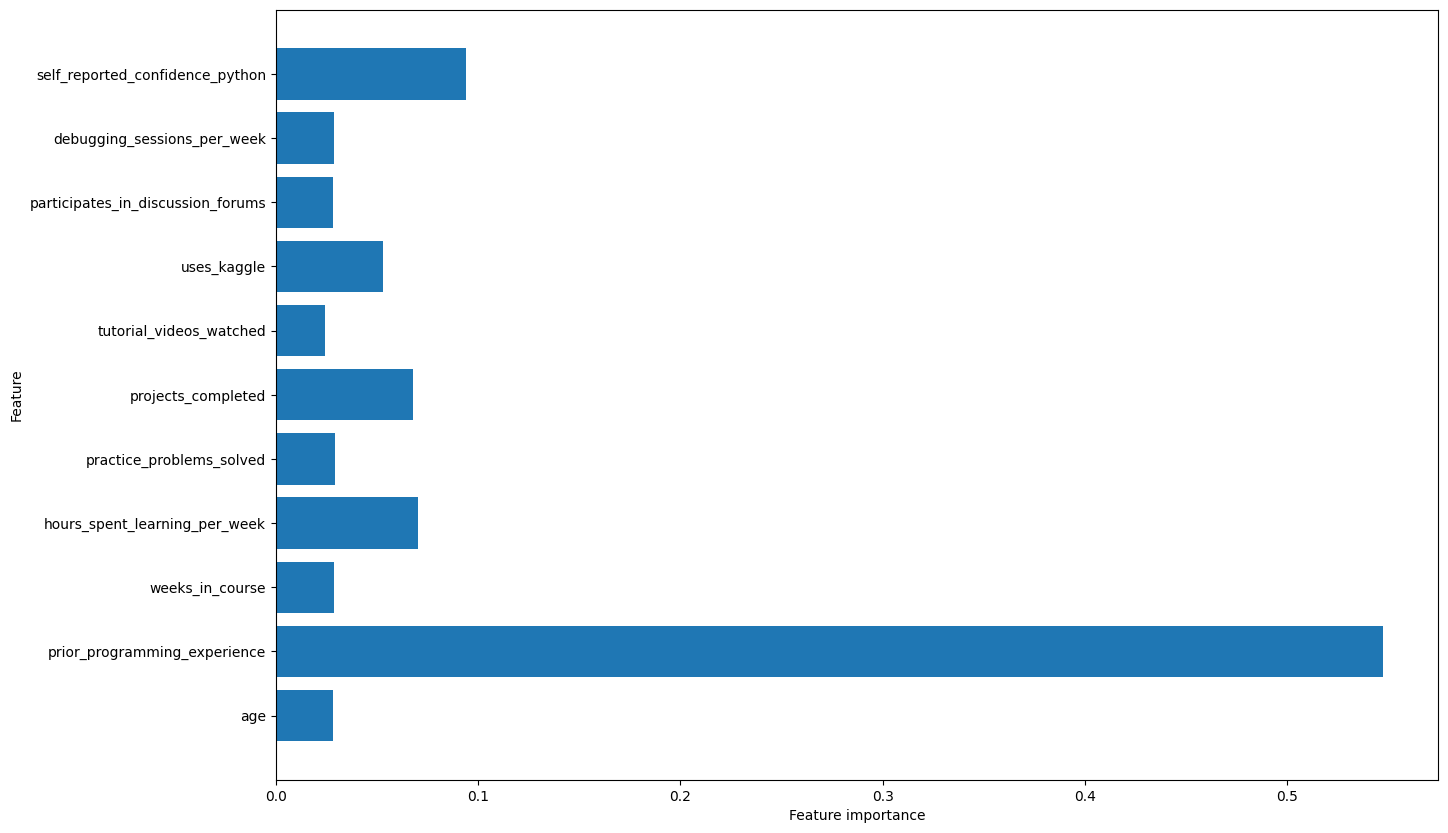

In [ ]:
print("Feature Importances XGBoost")
plot_feature_importances_attrition(xgboost)


In [ ]:
# Show feature importances greater than 0.05 (Decision Tree)
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
prior_programming_experience,0.424405
hours_spent_learning_per_week,0.144298
self_reported_confidence_python,0.098512
projects_completed,0.071991
practice_problems_solved,0.064446
age,0.054955


In [ ]:
# Show feature importances greater than 0.05 (Random Forest)
feature_importances = pd.Series(randomforest.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
prior_programming_experience,0.581157
hours_spent_learning_per_week,0.161155
self_reported_confidence_python,0.152470
projects_completed,0.078371


In [ ]:
# Show feature importances greater than 0.05 (XGBoost)
feature_importances = pd.Series(xgboost.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
prior_programming_experience,0.547422
self_reported_confidence_python,0.094052
hours_spent_learning_per_week,0.070272
projects_completed,0.067898
uses_kaggle,0.053009


In [ ]:
# Create a copy of df_encoded
df_encoded_copy = df_encoded.copy()

In [ ]:
# using only important features for the prediction (decision tree)
important_features = ["prior_programming_experience", "hours_spent_learning_per_week", "self_reported_confidence_python", "projects_completed", "practice_problems_solved", "age"]
X_importance_dt = df_encoded_copy[important_features] #input
y_importance_dt = df_encoded_copy['passed_exam'] #target

In [ ]:
display(X_importance_dt)
display(y_importance_dt)

,prior_programming_experience,hours_spent_learning_per_week,self_reported_confidence_python,projects_completed,practice_problems_solved,age
0,1,12.2,10,1,60,54
1,0,14.2,7,1,52,44
2,2,7.7,3,1,71,30
3,1,5.6,10,2,64,23
4,0,3.5,7,1,62,36
...,...,...,...,...,...,...
2995,0,9.3,4,2,60,39
2996,2,5.8,3,2,63,34
2997,1,1.4,7,2,63,52
2998,2,8.5,2,2,51,54


,passed_exam
0,0
1,0
2,0
3,0
4,0
...,...
2995,0
2996,0
2997,0
2998,0


In [ ]:
# using only important features for the prediction (random forest)
important_features = ["prior_programming_experience", "hours_spent_learning_per_week", "self_reported_confidence_python", "projects_completed"]
X_importance_rf = df_encoded_copy[important_features] #input
y_importance_rf = df_encoded_copy['passed_exam'] #target

In [ ]:
display(X_importance_rf)
display(y_importance_rf)

,prior_programming_experience,hours_spent_learning_per_week,self_reported_confidence_python,projects_completed
0,1,12.2,10,1
1,0,14.2,7,1
2,2,7.7,3,1
3,1,5.6,10,2
4,0,3.5,7,1
...,...,...,...,...
2995,0,9.3,4,2
2996,2,5.8,3,2
2997,1,1.4,7,2
2998,2,8.5,2,2


,passed_exam
0,0
1,0
2,0
3,0
4,0
...,...
2995,0
2996,0
2997,0
2998,0


In [ ]:
# using only important features for the prediction (xgboost)
important_features = ["prior_programming_experience", "self_reported_confidence_python", "hours_spent_learning_per_week", "projects_completed", "uses_kaggle"]
X_importance_xg = df_encoded_copy[important_features] #input
y_importance_xg = df_encoded_copy['passed_exam'] #target

In [ ]:
display(X_importance_xg)
display(y_importance_xg)

,prior_programming_experience,self_reported_confidence_python,hours_spent_learning_per_week,projects_completed,uses_kaggle
0,1,10,12.2,1,0
1,0,7,14.2,1,0
2,2,3,7.7,1,0
3,1,10,5.6,2,1
4,0,7,3.5,1,1
...,...,...,...,...,...
2995,0,4,9.3,2,1
2996,2,3,5.8,2,0
2997,1,7,1.4,2,1
2998,2,2,8.5,2,1


,passed_exam
0,0
1,0
2,0
3,0
4,0
...,...
2995,0
2996,0
2997,0
2998,0


In [ ]:
# oversampling again (decision tree)
categorical_features = ["prior_programming_experience", "self_reported_confidence_python", "projects_completed"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_importance_dt, y_importance_dt = smotenc.fit_resample(X_importance_dt, y_importance_dt)

X_train, X_test, y_train, y_test = train_test_split(X_importance_dt, y_importance_dt, test_size=0.2, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((3948, 6), (988, 6))

In [ ]:
# oversampling again (random forest)
categorical_features = ["prior_programming_experience", "self_reported_confidence_python", "projects_completed"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_importance_rf, y_importance_rf = smotenc.fit_resample(X_importance_rf, y_importance_rf)

X_train, X_test, y_train, y_test = train_test_split(X_importance_rf, y_importance_rf, test_size=0.2, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((3948, 4), (988, 4))

In [ ]:
# oversampling again (xgboost)
categorical_features = ["prior_programming_experience", "self_reported_confidence_python", "projects_completed", "uses_kaggle"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_importance_xg, y_importance_xg = smotenc.fit_resample(X_importance_xg, y_importance_xg)

X_train, X_test, y_train, y_test = train_test_split(X_importance_xg, y_importance_xg, test_size=0.2, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((3948, 5), (988, 5))

### 5.1 Decision Tree

In [ ]:
# Decision Tree
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance_dt, y_importance_dt, test_size=0.3, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_tree = importance_tree.predict(X_train_importance)
y_pred_test_tree = importance_tree.predict(X_test_importance)

print("Decision Tree")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_tree))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_tree))

Decision Tree

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1716
           1       1.00      1.00      1.00      1739

    accuracy                           1.00      3455
   macro avg       1.00      1.00      1.00      3455
weighted avg       1.00      1.00      1.00      3455


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       752
           1       0.87      0.87      0.87       729

    accuracy                           0.87      1481
   macro avg       0.87      0.87      0.87      1481
weighted avg       0.87      0.87      0.87      1481



Pada data uji setelah diterapkan feature selection, model Decision Tree menghasilkan akurasi sebesar 87% dengan performa yang seimbang antara kelas 0 dan kelas 1. Nilai precision, recall, dan F1-score untuk kedua kelas sama-sama berada pada angka 0,87, yang menunjukkan bahwa model mampu mengklasifikasikan kedua kelas dengan tingkat kesalahan yang relatif sama. Hasil ini mengindikasikan bahwa feature selection membantu mengurangi noise dan meningkatkan kemampuan generalisasi model, sehingga kinerja pada data uji menjadi lebih stabil dan tidak bias terhadap salah satu kelas.

### 5.2 Random Forest

In [ ]:
# Random Forest
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance_rf, y_importance_rf, test_size=0.3, random_state=42)

importance_rf = RandomForestClassifier(n_estimators=100, max_features="sqrt",
                               max_depth=6, max_leaf_nodes=6)
importance_rf.fit(X_train_importance, y_train_importance)

y_pred_train_randomforest = importance_rf.predict(X_train_importance)
y_pred_test_randomforest = importance_rf.predict(X_test_importance)

print("Random Forest")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_randomforest))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_randomforest))

Random Forest

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1716
           1       0.79      0.92      0.85      1739

    accuracy                           0.84      3455
   macro avg       0.85      0.84      0.84      3455
weighted avg       0.85      0.84      0.84      3455


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.91      0.77      0.84       752
           1       0.80      0.92      0.86       729

    accuracy                           0.85      1481
   macro avg       0.86      0.85      0.85      1481
weighted avg       0.86      0.85      0.85      1481



Pada data uji setelah diterapkan feature selection, model Random Forest mencapai akurasi sebesar 85% dengan kinerja yang cukup seimbang antara kedua kelas. Kelas 0 memiliki precision 0,91 dan recall 0,77, sedangkan kelas 1 memiliki precision 0,80 dan recall 0,92, yang menunjukkan bahwa model lebih baik dalam mendeteksi kelas 1 dibandingkan kelas 0. Nilai F1-score yang relatif seimbang antara kedua kelas (0,84 untuk kelas 0 dan 0,86 untuk kelas 1) mengindikasikan bahwa feature selection membantu Random Forest mempertahankan performa yang stabil serta mengurangi bias, meskipun masih terdapat perbedaan kecil dalam kemampuan mengenali masing-masing kelas.

### 5.3 XGBoost

In [ ]:
# XGBoost
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance_xg, y_importance_xg, test_size=0.3, random_state=42)

importance_xg = XGBClassifier(
    n_estimators=100,       # number of tree
    max_depth=6,            # max depth for each tree
    learning_rate=0.1,      # learning speed (default 0.1)
    subsample=0.8,          # proportion of samples used per tree
    colsample_bytree=0.8,   # proportion of features used by each tree
    objective='binary:logistic',  # binary classification
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'   # avoid warnings from XGBoost
)

# model practice
importance_xg.fit(X_train, y_train)

y_pred_train_xgboost = importance_xg.predict(X_train_importance)
y_pred_test_xgboost = importance_xg.predict(X_test_importance)

# evaluation
print("XGBoost Classifier")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_xgboost))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_xgboost))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:35:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classifier

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1716
           1       0.92      0.96      0.94      1739

    accuracy                           0.94      3455
   macro avg       0.94      0.94      0.94      3455
weighted avg       0.94      0.94      0.94      3455


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       752
           1       0.92      0.95      0.93       729

    accuracy                           0.93      1481
   macro avg       0.93      0.93      0.93      1481
weighted avg       0.93      0.93      0.93      1481



Pada data uji setelah diterapkan feature selection, model XGBoost Classifier menunjukkan performa yang sangat baik dengan akurasi sebesar 93%. Nilai precision, recall, dan F1-score untuk kelas 0 dan kelas 1 berada pada kisaran 0,92–0,95, yang menandakan bahwa model mampu mengklasifikasikan kedua kelas secara seimbang dan konsisten. Hasil ini menunjukkan bahwa feature selection efektif dalam mempertahankan informasi penting pada data sekaligus meningkatkan kemampuan generalisasi XGBoost, sehingga menghasilkan kinerja yang stabil dan akurat pada data uji.

# **F) MODEL EVALUATION**

## DECISION TREE

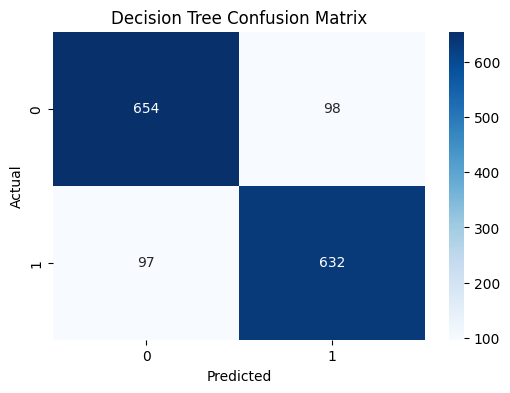

In [ ]:
from sklearn.metrics import confusion_matrix
# Decision Tree Confusion Matrix
cm_tree_final = confusion_matrix(y_test_importance, y_pred_test_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree_final, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Extract TN, FP, FN, TP from the confusion matrix for the Decision Tree model
tn, fp, fn, tp = cm_tree_final.ravel()

print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

True Negatives (TN): 654
False Positives (FP): 98
False Negatives (FN): 97
True Positives (TP): 632


Hasil confusion matrix menunjukkan bahwa model berhasil mengklasifikasikan **654 data sebagai tidak lulus dengan benar (True Negatives)** dan **632 data sebagai lulus dengan benar (True Positives)**, yang menandakan kemampuan model yang cukup baik dalam mengenali kedua kelas. Namun, masih terdapat **98 kasus False Positives**, yaitu siswa yang sebenarnya tidak lulus tetapi diprediksi lulus oleh model, serta **97 kasus False Negatives**, yaitu siswa yang sebenarnya lulus tetapi diprediksi tidak lulus. Jumlah kesalahan pada kedua jenis error tersebut relatif seimbang, sehingga model tidak terlalu bias ke salah satu kelas. Secara keseluruhan, performa model dapat dikatakan cukup stabil, meskipun masih terdapat ruang perbaikan untuk mengurangi kesalahan prediksi, terutama pada kasus siswa yang berpotensi lulus tetapi gagal teridentifikasi oleh model.

In [ ]:
print("Decision Tree")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_tree))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_tree))

Decision Tree

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1716
           1       1.00      1.00      1.00      1739

    accuracy                           1.00      3455
   macro avg       1.00      1.00      1.00      3455
weighted avg       1.00      1.00      1.00      3455


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       752
           1       0.87      0.87      0.87       729

    accuracy                           0.87      1481
   macro avg       0.87      0.87      0.87      1481
weighted avg       0.87      0.87      0.87      1481



Hasil **classification report** menunjukkan bahwa model **Decision Tree** mencapai performa **sempurna pada data training** dengan nilai precision, recall, dan F1-score sebesar **1.00** untuk kedua kelas, yang mengindikasikan bahwa model mampu menghafal seluruh pola pada data latih. Namun, pada **data testing**, performa menurun menjadi **akurasi 0.87** dengan precision, recall, dan F1-score yang sama untuk kelas lulus (1) maupun tidak lulus (0), sehingga menunjukkan kemampuan generalisasi yang cukup baik tetapi tidak sempurna. Perbedaan yang sangat kontras antara performa training dan testing ini mengindikasikan adanya **overfitting**, di mana model terlalu kompleks dan menyesuaikan diri secara berlebihan terhadap data latih.

## RANDOM FOREST

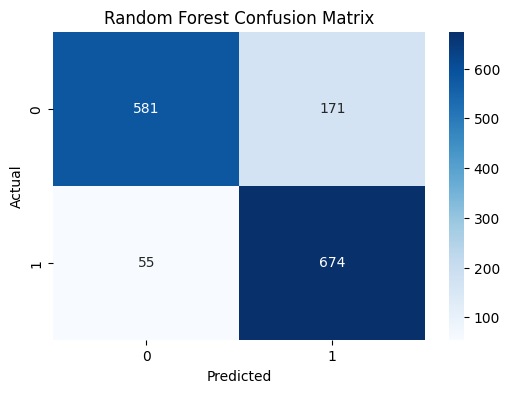

In [ ]:
# Random Forest Confusion Matrix
cm_rf_final = confusion_matrix(y_test_importance, y_pred_test_randomforest)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf_final, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Extract TN, FP, FN, TP from the confusion matrix for the Random Forest model
tn, fp, fn, tp = cm_rf_final.ravel()

print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

True Negatives (TN): 581
False Positives (FP): 171
False Negatives (FN): 55
True Positives (TP): 674


Confusion matrix ini menunjukkan bahwa model mampu mengklasifikasikan **581 data tidak lulus dengan benar (True Negatives)** dan **674 data lulus dengan benar (True Positives)**, yang mengindikasikan performa yang cukup baik dalam mengenali kedua kelas. Namun, terdapat **171 kasus False Positives**, yaitu siswa yang sebenarnya tidak lulus tetapi diprediksi lulus oleh model, jumlahnya relatif lebih tinggi dibandingkan **55 kasus False Negatives**, yaitu siswa yang sebenarnya lulus tetapi diprediksi tidak lulus. Pola ini menunjukkan bahwa model cenderung **lebih permisif dalam memprediksi kelulusan**, sehingga berisiko memberikan prediksi lulus pada siswa yang sebenarnya tidak memenuhi kriteria. Dari sudut pandang klasifikasi, model memiliki **recall yang baik untuk kelas lulus**, tetapi **presisi untuk prediksi lulus masih perlu ditingkatkan** agar kesalahan false positive dapat diminimalkan.

In [ ]:
print("Random Forest")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_randomforest))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_randomforest))

Random Forest

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1716
           1       0.79      0.92      0.85      1739

    accuracy                           0.84      3455
   macro avg       0.85      0.84      0.84      3455
weighted avg       0.85      0.84      0.84      3455


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.91      0.77      0.84       752
           1       0.80      0.92      0.86       729

    accuracy                           0.85      1481
   macro avg       0.86      0.85      0.85      1481
weighted avg       0.86      0.85      0.85      1481



Classification report menunjukkan bahwa model **Random Forest** memiliki performa yang **konsisten antara data training dan data testing**, dengan akurasi masing-masing sekitar **0.84-0.85**, yang menandakan kemampuan generalisasi yang baik dan risiko overfitting yang relatif rendah dibandingkan Decision Tree. Pada data uji, model menunjukkan **recall yang tinggi untuk kelas lulus (kelas 1 = 0.92)**, artinya sebagian besar siswa yang benar-benar lulus berhasil teridentifikasi dengan baik, meskipun precision untuk kelas tersebut lebih rendah (0.80), yang mengindikasikan masih adanya prediksi lulus yang keliru. Sebaliknya, untuk kelas tidak lulus (kelas 0), precision cukup tinggi (0.91) tetapi recall lebih rendah (0.77), sehingga beberapa siswa yang tidak lulus masih salah diklasifikasikan. Secara keseluruhan, Random Forest menawarkan **keseimbangan performa yang lebih stabil dan realistis**, menjadikannya model yang lebih andal untuk klasifikasi kelulusan dibandingkan Decision Tree tunggal.

## XGBOOST

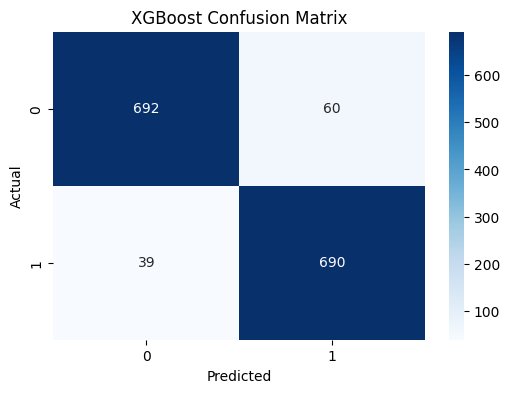

In [ ]:
# XGBoost Confusion Matrix
cm_xgb_final = confusion_matrix(y_test_importance, y_pred_test_xgboost)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb_final, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Extract TN, FP, FN, TP from the confusion matrix for the XGBoost model
tn, fp, fn, tp = cm_xgb_final.ravel()

print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

True Negatives (TN): 692
False Positives (FP): 60
False Negatives (FN): 39
True Positives (TP): 690


Confusion matrix ini menunjukkan bahwa model memiliki performa yang sangat baik dalam mengklasifikasikan kedua kelas, dengan **692 data tidak lulus yang diprediksi dengan benar (True Negatives)** dan **690 data lulus yang diprediksi dengan benar (True Positives)**. Jumlah kesalahan relatif kecil, terlihat dari **60 kasus False Positives** (siswa tidak lulus tetapi diprediksi lulus) dan **39 kasus False Negatives** (siswa lulus tetapi diprediksi tidak lulus), yang menandakan keseimbangan error yang cukup baik antar kelas. Pola ini mengindikasikan bahwa model mampu membedakan siswa yang lulus dan tidak lulus secara konsisten tanpa kecenderungan bias yang kuat terhadap salah satu kelas. Secara keseluruhan, model ini menunjukkan **kinerja klasifikasi yang stabil dan andal**, serta lebih unggul dibandingkan model dengan tingkat kesalahan yang lebih tinggi pada salah satu jenis prediksi.


In [ ]:
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_xgboost))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_xgboost))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1716
           1       0.92      0.96      0.94      1739

    accuracy                           0.94      3455
   macro avg       0.94      0.94      0.94      3455
weighted avg       0.94      0.94      0.94      3455


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       752
           1       0.92      0.95      0.93       729

    accuracy                           0.93      1481
   macro avg       0.93      0.93      0.93      1481
weighted avg       0.93      0.93      0.93      1481



Classification report menunjukkan bahwa model **XGBoost** memiliki **performa yang sangat kuat dan seimbang** baik pada data training maupun data testing. Pada data latih, model mencapai akurasi **0.94** dengan nilai precision, recall, dan F1-score yang tinggi dan relatif seimbang untuk kedua kelas, yang menandakan bahwa model mampu mempelajari pola data dengan baik tanpa menghafal secara berlebihan. Pada data uji, akurasi hanya turun sedikit menjadi **0.93**, dengan F1-score **0.93** untuk kelas lulus maupun tidak lulus, menunjukkan **kemampuan generalisasi yang sangat baik** dan tingkat overfitting yang minimal. Secara keseluruhan, XGBoost memberikan **kinerja terbaik dibandingkan model sebelumnya**, karena mampu menyeimbangkan ketepatan prediksi dan cakupan identifikasi kelas secara konsisten, sehingga sangat cocok digunakan sebagai model utama untuk klasifikasi kelulusan.

## Conclusion

Berdasarkan perbandingan F1-score dari ketiga model setelah dilakukan feature selection, **XGBoost** menunjukkan performa terbaik dengan F1-score sebesar **0.93**. Ini mengindikasikan bahwa XGBoost memiliki keseimbangan terbaik antara precision dan recall dalam mengklasifikasikan siswa yang lulus dan tidak lulus ujian, bahkan setelah mengatasi masalah ketidakseimbangan kelas menggunakan SMOTENC dan mengoptimalkan fitur-faktor penting.

### Implikasi:

1.  **Prediksi yang Lebih Akurat**: Model XGBoost dapat digunakan untuk memprediksi probabilitas kelulusan siswa dengan tingkat akurasi dan keandalan yang tinggi. Ini memungkinkan institusi pendidikan untuk mengidentifikasi siswa yang berisiko tidak lulus lebih awal.
2.  **Intervensi Dini**: Dengan mengidentifikasi faktor-faktor penting (seperti 'prior_programming_experience', 'self_reported_confidence_python', 'hours_spent_learning_per_week', 'projects_completed', dan 'uses_kaggle') yang berpengaruh signifikan, institusi dapat merancang program intervensi atau dukungan yang ditargetkan untuk siswa yang membutuhkan, sehingga meningkatkan tingkat kelulusan secara keseluruhan.
3.  **Efisiensi Sumber Daya**: Dengan fokus pada fitur-fitur paling penting, model menjadi lebih ringan dan cepat dalam prediksi, serta membantu mengalokasikan sumber daya secara lebih efisien kepada siswa yang paling memerlukannya.

Secara keseluruhan, XGBoost merupakan pilihan model yang paling efektif untuk memprediksi kelulusan ujian dalam konteks ini, dengan potensi besar untuk aplikasi praktis dalam sistem pendukung keputusan pendidikan.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# --- Define a function to extract metrics ---
def get_metrics(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision_weighted = report['weighted avg']['precision']
    recall_weighted = report['weighted avg']['recall']
    f1_weighted = report['weighted avg']['f1-score']

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision_weighted,
        'Recall': recall_weighted,
        'F1-Score': f1_weighted
    }

# --- Extract metrics for each model ---

# Decision Tree (from AWkP93usRL1B)
dt_metrics = get_metrics(y_test_importance, y_pred_test_tree, 'Decision Tree')

# Random Forest (from sC93yznxRLkr)
rf_metrics = get_metrics(y_test_importance, y_pred_test_randomforest, 'Random Forest')

# XGBoost (from -mou4Xn3RLcM)
xgb_metrics = get_metrics(y_test_importance, y_pred_test_xgboost, 'XGBoost')

# --- Create a DataFrame for comparison ---
comparison_df = pd.DataFrame([dt_metrics, rf_metrics, xgb_metrics])

display(comparison_df)

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.868332,0.868336,0.868332,0.868334
1,Random Forest,0.847400,0.856477,0.847400,0.846647
2,XGBoost,0.933153,0.933531,0.933153,0.933155


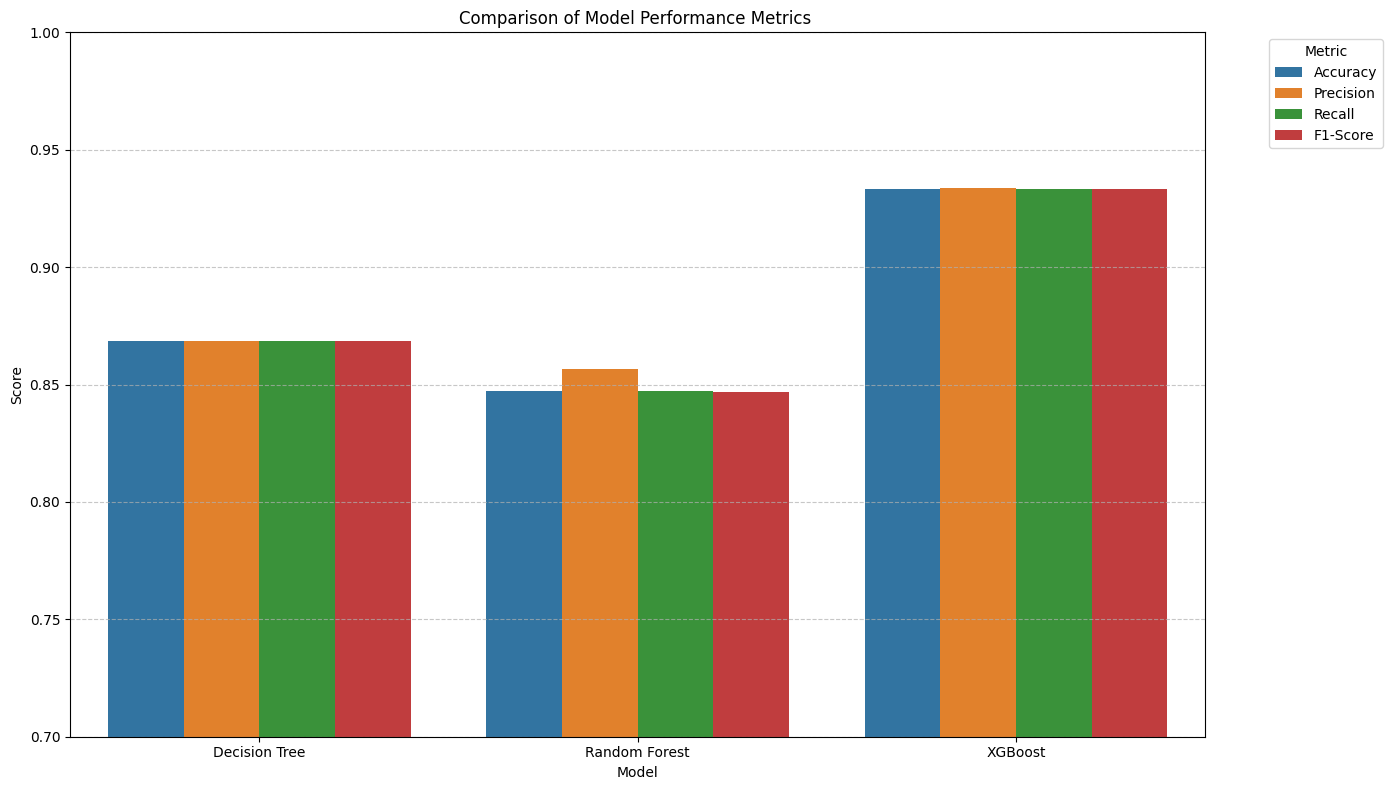

In [ ]:
# Reshape the DataFrame for grouped bar plot
comparison_df_melted = comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=comparison_df_melted, palette='tab10')
plt.title('Comparison of Model Performance Metrics ')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0.7, 1.0) # Adjust y-limit for better comparison
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Tabel dan grafik perbandingan menunjukkan bahwa **XGBoost secara konsisten mengungguli Decision Tree dan Random Forest** pada seluruh metrik evaluasi, dengan nilai **accuracy, precision, recall, dan F1-score sekitar 0.93**, yang menandakan kemampuan klasifikasi yang paling akurat dan seimbang. **Decision Tree** berada di posisi menengah dengan performa sekitar **0.87**, namun cenderung kurang stabil karena model tunggal lebih rentan terhadap overfitting dan variasi data. **Random Forest** menunjukkan performa yang sedikit lebih rendah dibandingkan Decision Tree pada dataset ini, meskipun umumnya lebih robust, kemungkinan dipengaruhi oleh konfigurasi hyperparameter atau karakteristik data. Secara keseluruhan, hasil ini mengindikasikan bahwa **XGBoost merupakan model terbaik** untuk tugas klasifikasi kelulusan pada dataset ini karena mampu menangkap pola kompleks secara efektif sekaligus mempertahankan kemampuan generalisasi yang baik.


### **Decision Tree**

* **(+):** Mudah dipahami dan diinterpretasikan karena aturan keputusan bersifat eksplisit.
* **(+):** Cocok untuk eksplorasi awal dan pemahaman pola data.
* **(-):** Mengalami overfitting yang kuat, terlihat dari performa training yang sempurna namun menurun pada data testing.
* **(-):** Kemampuan generalisasi rendah jika tidak dilakukan pruning atau pembatasan kompleksitas model.

---

### **Random Forest**

* **(+):** Lebih stabil dan robust dibandingkan Decision Tree karena menggabungkan banyak pohon keputusan.
* **(+):** Mampu mengurangi overfitting dan menghasilkan performa yang cukup konsisten pada data uji.
* **(-):** Performa masih lebih rendah dibandingkan XGBoost pada seluruh metrik evaluasi.
* **(-):** Interpretasi model lebih kompleks dan membutuhkan sumber daya komputasi lebih besar.

---

### **XGBoost**

* **(+):** Memberikan performa terbaik dan paling konsisten pada accuracy, precision, recall, dan F1-score.
* **(+):** Memiliki kemampuan generalisasi yang sangat baik dengan indikasi overfitting yang minimal.
* **(+):** Efektif menangkap hubungan non-linear dan interaksi kompleks antar fitur.
* **(-):** Model lebih kompleks dan sulit diinterpretasikan dibandingkan Decision Tree.
* **(-):** Memerlukan proses tuning hyperparameter yang lebih cermat.

---

### **Kesimpulan Akhir**

* **XGBoost dipilih sebagai model terbaik** untuk klasifikasi kelulusan siswa karena kinerjanya paling unggul dan stabil.
* **Decision Tree** cocok sebagai model interpretatif awal, sedangkan **Random Forest** menjadi alternatif yang cukup robust.
* Pemilihan model didasarkan pada keseimbangan antara performa, generalisasi, dan validitas metodologis.


# **G) INTERPRETATION**



---

## **Decision Tree - BEFORE Tuning (Model Awal)**

* **Training performance:**

  * Accuracy, precision, recall, dan F1-score = **1.00** untuk semua kelas → indikasi **overfitting sangat kuat**.
* **Test performance:**

  * Accuracy masih terlihat cukup baik (**0.85**), tetapi **tidak seimbang antar kelas**.
  * **Kelas 0 (tidak lulus):** Precision 0.91, recall 0.90 → terprediksi dengan baik.
  * **Kelas 1 (lulus):** Precision 0.59, recall 0.62 → banyak siswa lulus salah diprediksi sebagai tidak lulus.
* **Kesimpulan:**

  * Model sangat bias ke kelas mayoritas dan **gagal menangkap pola kelas minoritas**, sehingga kurang layak digunakan untuk klasifikasi yang adil.


## **Decision Tree - AFTER Tuning (Model Teroptimasi)**

* **Training performance:**

  * Tetap sangat tinggi (accuracy = **1.00**), namun kompleksitas model sudah dikontrol.
* **Test performance:**

  * Accuracy meningkat menjadi **0.87** dan **lebih seimbang antar kelas**.
  * **Kelas 0 dan kelas 1:** Precision, recall, dan F1-score sama-sama **0.87**.
* **Kesimpulan:**

  * Tuning berhasil **mengurangi overfitting dan bias kelas**, meningkatkan kemampuan generalisasi, serta membuat model lebih stabil dan reliabel untuk memprediksi kelulusan.


## **Ringkasan Akhir**

* **Before tuning:** Model kuat di training tetapi lemah dan bias di data uji.
* **After tuning:** Model lebih seimbang, adil, dan layak digunakan meskipun tetap sederhana dibandingkan ensemble model.


---

## **Random Forest - BEFORE Tuning (Model Awal)**

* **Training performance:**

  * Accuracy terlihat cukup tinggi (**0.84**), namun terjadi **ketimpangan ekstrem antar kelas**.
  * **Kelas 0 (tidak lulus):** Recall = **1.00** → hampir semua data diprediksi sebagai kelas 0.
  * **Kelas 1 (lulus):** Recall = **0.08**, F1-score = **0.14** → model hampir gagal mengenali kelas lulus.
* **Test performance:**

  * Pola yang sama berlanjut pada data uji, dengan **recall kelas 1 hanya 0.08**.
  * Accuracy (**0.83**) tampak menipu karena didominasi oleh prediksi kelas mayoritas.
* **Kesimpulan:**

  * Model sangat **bias terhadap kelas mayoritas** dan tidak mampu menangkap pola kelas minoritas, sehingga tidak layak digunakan tanpa perbaikan.


## **Random Forest - AFTER Tuning (Model Teroptimasi)**

* **Training performance:**

  * Precision, recall, dan F1-score menjadi **lebih seimbang antar kelas**.
  * **Kelas 1 (lulus):** Recall meningkat drastis menjadi **0.92**, menunjukkan perbaikan signifikan dalam mendeteksi siswa lulus.
* **Test performance:**

  * Accuracy meningkat menjadi **0.85** dengan **macro dan weighted average yang seimbang**.
  * **Kelas 0 dan kelas 1** memiliki performa yang relatif seimbang (F1-score ≈ 0.84–0.86).
* **Kesimpulan:**

  * Tuning berhasil **menghilangkan bias kelas**, meningkatkan kemampuan generalisasi, dan menjadikan Random Forest **model yang stabil dan reliabel** untuk klasifikasi kelulusan.


## **Ringkasan Akhir**

* **Before tuning:** Akurasi tampak baik, tetapi model gagal mengenali kelas lulus.
* **After tuning:** Model mampu membedakan kedua kelas secara adil dengan performa yang konsisten di training dan testing.


---

## **XGBoost - BEFORE Tuning (Model Awal)**

* **Training performance:**

  * Accuracy sangat tinggi (**0.99**) dengan precision dan recall hampir sempurna untuk kedua kelas.
  * Hal ini mengindikasikan model **sangat kuat dalam mempelajari data latih**, namun mulai menunjukkan tanda **overfitting ringan**.
* **Test performance:**

  * Accuracy turun menjadi **0.90**.
  * **Kelas 0 (tidak lulus):** Performa masih sangat baik (F1-score = **0.94**).
  * **Kelas 1 (lulus):** Precision **0.75**, recall **0.67**, F1-score **0.71**, menunjukkan model **belum optimal dalam mendeteksi kelas minoritas**.
* **Kesimpulan:**

  * Model masih cenderung **bias ke kelas mayoritas**, meskipun secara umum performanya sudah lebih baik dibanding Decision Tree dan Random Forest sebelum tuning.


## **XGBoost - AFTER Tuning (Model Teroptimasi)**

* **Training performance:**

  * Accuracy menjadi **0.94** dengan precision, recall, dan F1-score yang **seimbang antar kelas**, menandakan kompleksitas model lebih terkontrol.
* **Test performance:**

  * Accuracy meningkat menjadi **0.93** dengan **keseimbangan performa yang sangat baik**.
  * **Kelas 0 dan kelas 1:** Precision, recall, dan F1-score semuanya berada di sekitar **0.92-0.95**, tanpa bias kelas yang signifikan.
* **Kesimpulan:**

  * Tuning berhasil **mengurangi overfitting dan bias kelas**, meningkatkan kemampuan generalisasi, serta menjadikan XGBoost **model paling stabil dan andal** dalam mengklasifikasikan kelulusan siswa.


## **Ringkasan Akhir**

* **Before tuning:** XGBoost sudah kuat, tetapi masih kurang adil dalam mengenali kelas lulus.
* **After tuning:** XGBoost menjadi **model terbaik secara keseluruhan**, dengan performa tinggi, seimbang, dan konsisten pada data training maupun testing.


## **FUNGSI**

* **KFold Cross-Validation**
  Membagi data ke dalam beberapa lipatan sehingga model dilatih dan diuji secara bergantian pada bagian data yang berbeda. Pendekatan ini membuat evaluasi performa lebih representatif dan membantu mengurangi risiko overfitting akibat ketergantungan pada satu pembagian data saja.

* **GridSearch Hyperparameter Tuning**
  Menguji berbagai kombinasi parameter model untuk menemukan konfigurasi yang paling optimal. Dengan parameter yang tepat, model dapat bekerja lebih efektif dalam menangkap pola data tanpa menjadi terlalu kompleks atau terlalu sederhana.

* **Feature Selection**
  Memilih fitur-fitur yang paling relevan terhadap target dan menghilangkan fitur yang kurang informatif. Langkah ini mengurangi noise, meningkatkan efisiensi komputasi, serta membantu model fokus pada variabel yang benar-benar berpengaruh.


## **kesimpulan implikasi bisnis**

* **Pendukung pengambilan keputusan berbasis data**
  Model klasifikasi yang telah dituning, terutama XGBoost, dapat digunakan untuk memprediksi peluang kelulusan siswa secara akurat sehingga membantu manajemen mengambil keputusan yang lebih objektif dan tepat sasaran.

* **Intervensi dini terhadap siswa berisiko**
  Dengan mengidentifikasi siswa yang berpotensi tidak lulus sejak awal, bisnis edtech dapat memberikan dukungan tambahan seperti mentoring, rekomendasi latihan, atau penyesuaian kurikulum secara proaktif.

* **Optimalisasi alokasi sumber daya**
  Hasil feature selection menunjukkan faktor-faktor pembelajaran yang paling berpengaruh, sehingga perusahaan dapat memfokuskan investasi pada fitur dan layanan yang memberikan dampak terbesar terhadap keberhasilan pengguna.

* **Peningkatan tingkat kelulusan dan kepuasan pengguna**
  Prediksi yang lebih akurat memungkinkan pengalaman belajar yang lebih personal, meningkatkan peluang keberhasilan siswa dan kepuasan terhadap platform.

* **Peningkatan retensi dan nilai bisnis jangka panjang**
  Dengan meningkatnya keberhasilan belajar dan kepuasan pengguna, platform memiliki peluang lebih besar untuk mempertahankan pelanggan, meningkatkan loyalitas, dan memperkuat daya saing di industri pendidikan digital.
